In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn import metrics

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import plotly.express as px
import warnings

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.shape

(569, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
df.duplicated().sum()

0

In [7]:
cancer_df = df[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','symmetry_mean']]
cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,symmetry_mean
0,1,17.99,10.38,122.80,1001.0,0.2419
1,1,20.57,17.77,132.90,1326.0,0.1812
2,1,19.69,21.25,130.00,1203.0,0.2069
3,1,11.42,20.38,77.58,386.1,0.2597
4,1,20.29,14.34,135.10,1297.0,0.1809


In [8]:
cancer_df.columns = ['diagnostico','raio','textura','perímetro','área','simetria']
cancer_df.head()

,diagnostico,raio,textura,perímetro,área,simetria
0,1,17.99,10.38,122.80,1001.0,0.2419
1,1,20.57,17.77,132.90,1326.0,0.1812
2,1,19.69,21.25,130.00,1203.0,0.2069
3,1,11.42,20.38,77.58,386.1,0.2597
4,1,20.29,14.34,135.10,1297.0,0.1809


In [9]:
cancer_df['diagnostico'].value_counts()

0    357
1    212
Name: diagnostico, dtype: int64

In [10]:
cancer_df['diagnostico'].value_counts(normalize=True)

0    0.627417
1    0.372583
Name: diagnostico, dtype: float64

<AxesSubplot:xlabel='diagnostico', ylabel='count'>

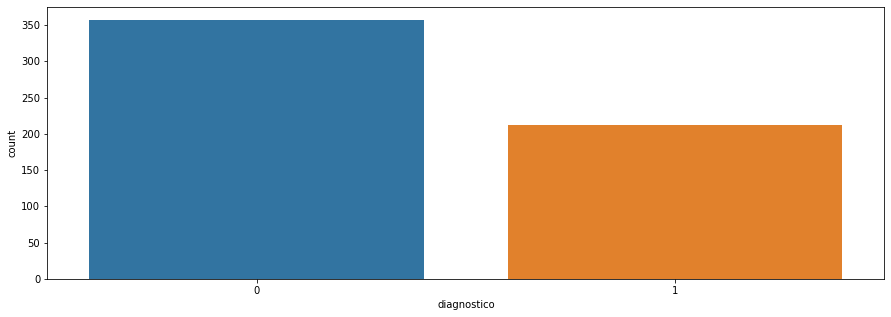

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(data=cancer_df,x='diagnostico')

In [12]:
X = cancer_df.drop(['diagnostico'], axis=1)
y = cancer_df['diagnostico']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [14]:
print(f'Conjunto de treino : {X_train.shape}')
print(f'Conjunto de treino : {X_test.shape}')

Conjunto de treino : (455, 5)
Conjunto de treino : (114, 5)


In [15]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X_train)

y = sc_X.fit_transform(np.array(y_train).reshape(-1,1))

## Regressão Logística

In [107]:
param_grid = {'penalty':['l1', 'l2', 'elasticnet', None],
                'C':range(1,101)}

metrica = "f1_weighted"

log_reg = GridSearchCV(estimator =LogisticRegression() ,
                           param_grid = param_grid,
                           scoring = metrica,
                           cv = 5,
                           verbose = 10)


In [108]:
log_reg

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': range(1, 101),
                         'penalty': ['l1', 'l2', 'elasticnet', None]},
             scoring='recall', verbose=10)

In [109]:
log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV 1/5; 1/400] START C=1, penalty=l1...........................................
[CV 1/5; 1/400] END ..............C=1, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 1/400] START C=1, penalty=l1...........................................
[CV 2/5; 1/400] END ..............C=1, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 1/400] START C=1, penalty=l1...........................................
[CV 3/5; 1/400] END ..............C=1, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 1/400] START C=1, penalty=l1...........................................
[CV 4/5; 1/400] END ..............C=1, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 1/400] START C=1, penalty=l1...........................................
[CV 5/5; 1/400] END ..............C=1, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 2/400] START C=1, penalty=l2...........................................


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-pa

[CV 1/5; 2/400] END ............C=1, penalty=l2;, score=0.909 total time=   5.7s
[CV 2/5; 2/400] START C=1, penalty=l2...........................................
[CV 2/5; 2/400] END ............C=1, penalty=l2;, score=0.794 total time=   0.0s
[CV 3/5; 2/400] START C=1, penalty=l2...........................................
[CV 3/5; 2/400] END ............C=1, penalty=l2;, score=0.912 total time=   0.0s
[CV 4/5; 2/400] START C=1, penalty=l2...........................................
[CV 4/5; 2/400] END ............C=1, penalty=l2;, score=0.765 total time=   0.0s
[CV 5/5; 2/400] START C=1, penalty=l2...........................................
[CV 5/5; 2/400] END ............C=1, penalty=l2;, score=0.794 total time=   0.0s
[CV 1/5; 3/400] START C=1, penalty=elasticnet...................................
[CV 1/5; 3/400] END ......C=1, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 3/400] START C=1, penalty=elasticnet...................................
[CV 2/5; 3/400] END ......C=

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 3/5; 4/400] END ..........C=1, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 4/400] START C=1, penalty=None.........................................
[CV 4/5; 4/400] END ..........C=1, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 4/400] START C=1, penalty=None.........................................
[CV 5/5; 4/400] END ..........C=1, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 5/400] START C=2, penalty=l1...........................................
[CV 1/5; 5/400] END ..............C=2, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 5/400] START C=2, penalty=l1...........................................
[CV 2/5; 5/400] END ..............C=2, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 5/400] START C=2, penalty=l1...........................................
[CV 3/5; 5/400] END ..............C=2, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 5/400] START C=2, penalty=l1...........................................
[CV 4/5; 5/400] END ........

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib

[CV 4/5; 8/400] END ..........C=2, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 8/400] START C=2, penalty=None.........................................
[CV 5/5; 8/400] END ..........C=2, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 9/400] START C=3, penalty=l1...........................................
[CV 1/5; 9/400] END ..............C=3, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 9/400] START C=3, penalty=l1...........................................
[CV 2/5; 9/400] END ..............C=3, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 9/400] START C=3, penalty=l1...........................................
[CV 3/5; 9/400] END ..............C=3, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 9/400] START C=3, penalty=l1...........................................
[CV 4/5; 9/400] END ..............C=3, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 9/400] START C=3, penalty=l1...........................................
[CV 5/5; 9/400] END ........

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-pa

[CV 5/5; 10/400] END ...........C=3, penalty=l2;, score=0.765 total time=   0.0s
[CV 1/5; 11/400] START C=3, penalty=elasticnet..................................
[CV 1/5; 11/400] END .....C=3, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 11/400] START C=3, penalty=elasticnet..................................
[CV 2/5; 11/400] END .....C=3, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 11/400] START C=3, penalty=elasticnet..................................
[CV 3/5; 11/400] END .....C=3, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5; 11/400] START C=3, penalty=elasticnet..................................
[CV 4/5; 11/400] END .....C=3, penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5; 11/400] START C=3, penalty=elasticnet..................................
[CV 5/5; 11/400] END .....C=3, penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/5; 12/400] START C=3, penalty=None........................................
[CV 1/5; 12/400] END .......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib

[CV 1/5; 14/400] END ...........C=4, penalty=l2;, score=0.848 total time=   0.0s
[CV 2/5; 14/400] START C=4, penalty=l2..........................................
[CV 2/5; 14/400] END ...........C=4, penalty=l2;, score=0.765 total time=   0.0s
[CV 3/5; 14/400] START C=4, penalty=l2..........................................
[CV 3/5; 14/400] END ...........C=4, penalty=l2;, score=0.912 total time=   0.0s
[CV 4/5; 14/400] START C=4, penalty=l2..........................................
[CV 4/5; 14/400] END ...........C=4, penalty=l2;, score=0.765 total time=   0.0s
[CV 5/5; 14/400] START C=4, penalty=l2..........................................
[CV 5/5; 14/400] END ...........C=4, penalty=l2;, score=0.794 total time=   0.0s
[CV 1/5; 15/400] START C=4, penalty=elasticnet..................................
[CV 1/5; 15/400] END .....C=4, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 15/400] START C=4, penalty=elasticnet..................................
[CV 2/5; 15/400] END .....C=

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib

[CV 2/5; 16/400] END .........C=4, penalty=None;, score=0.853 total time=   0.0s
[CV 3/5; 16/400] START C=4, penalty=None........................................
[CV 3/5; 16/400] END .........C=4, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 16/400] START C=4, penalty=None........................................
[CV 4/5; 16/400] END .........C=4, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 16/400] START C=4, penalty=None........................................
[CV 5/5; 16/400] END .........C=4, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 17/400] START C=5, penalty=l1..........................................
[CV 1/5; 17/400] END .............C=5, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 17/400] START C=5, penalty=l1..........................................
[CV 2/5; 17/400] END .............C=5, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 17/400] START C=5, penalty=l1..........................................
[CV 3/5; 17/400] END .......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 3/5; 20/400] END .........C=5, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 20/400] START C=5, penalty=None........................................
[CV 4/5; 20/400] END .........C=5, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 20/400] START C=5, penalty=None........................................
[CV 5/5; 20/400] END .........C=5, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 21/400] START C=6, penalty=l1..........................................
[CV 1/5; 21/400] END .............C=6, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 21/400] START C=6, penalty=l1..........................................
[CV 2/5; 21/400] END .............C=6, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 21/400] START C=6, penalty=l1..........................................
[CV 3/5; 21/400] END .............C=6, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 21/400] START C=6, penalty=l1..........................................
[CV 4/5; 21/400] END .......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib

[CV 5/5; 22/400] END ...........C=6, penalty=l2;, score=0.794 total time=   0.0s
[CV 1/5; 23/400] START C=6, penalty=elasticnet..................................
[CV 1/5; 23/400] END .....C=6, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 23/400] START C=6, penalty=elasticnet..................................
[CV 2/5; 23/400] END .....C=6, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 23/400] START C=6, penalty=elasticnet..................................
[CV 3/5; 23/400] END .....C=6, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5; 23/400] START C=6, penalty=elasticnet..................................
[CV 4/5; 23/400] END .....C=6, penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5; 23/400] START C=6, penalty=elasticnet..................................
[CV 5/5; 23/400] END .....C=6, penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/5; 24/400] START C=6, penalty=None........................................
[CV 1/5; 24/400] END .......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters



[CV 1/5; 25/400] START C=7, penalty=l1..........................................
[CV 1/5; 25/400] END .............C=7, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 25/400] START C=7, penalty=l1..........................................
[CV 2/5; 25/400] END .............C=7, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 25/400] START C=7, penalty=l1..........................................
[CV 3/5; 25/400] END .............C=7, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 25/400] START C=7, penalty=l1..........................................
[CV 4/5; 25/400] END .............C=7, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 25/400] START C=7, penalty=l1..........................................
[CV 5/5; 25/400] END .............C=7, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 26/400] START C=7, penalty=l2..........................................
[CV 1/5; 26/400] END ...........C=7, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5; 26/400] START C=7, 

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib

[CV 5/5; 26/400] END ...........C=7, penalty=l2;, score=0.794 total time=   0.0s
[CV 1/5; 27/400] START C=7, penalty=elasticnet..................................
[CV 1/5; 27/400] END .....C=7, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 27/400] START C=7, penalty=elasticnet..................................
[CV 2/5; 27/400] END .....C=7, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 27/400] START C=7, penalty=elasticnet..................................
[CV 3/5; 27/400] END .....C=7, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5; 27/400] START C=7, penalty=elasticnet..................................
[CV 4/5; 27/400] END .....C=7, penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5; 27/400] START C=7, penalty=elasticnet..................................
[CV 5/5; 27/400] END .....C=7, penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/5; 28/400] START C=7, penalty=None........................................
[CV 1/5; 28/400] END .......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 2/5; 33/400] START C=9, penalty=l1..........................................
[CV 2/5; 33/400] END .............C=9, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 33/400] START C=9, penalty=l1..........................................
[CV 3/5; 33/400] END .............C=9, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 33/400] START C=9, penalty=l1..........................................
[CV 4/5; 33/400] END .............C=9, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 33/400] START C=9, penalty=l1..........................................
[CV 5/5; 33/400] END .............C=9, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 34/400] START C=9, penalty=l2..........................................
[CV 1/5; 34/400] END ...........C=9, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5; 34/400] START C=9, penalty=l2..........................................
[CV 2/5; 34/400] END ...........C=9, penalty=l2;, score=0.824 total time=   0.0s
[CV 3/5; 34/400] START C=9, 

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters



[CV 1/5; 35/400] END .....C=9, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 35/400] START C=9, penalty=elasticnet..................................
[CV 2/5; 35/400] END .....C=9, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 35/400] START C=9, penalty=elasticnet..................................
[CV 3/5; 35/400] END .....C=9, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5; 35/400] START C=9, penalty=elasticnet..................................
[CV 4/5; 35/400] END .....C=9, penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5; 35/400] START C=9, penalty=elasticnet..................................
[CV 5/5; 35/400] END .....C=9, penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/5; 36/400] START C=9, penalty=None........................................
[CV 1/5; 36/400] END .........C=9, penalty=None;, score=0.909 total time=   0.0s
[CV 2/5; 36/400] START C=9, penalty=None........................................
[CV 2/5; 36/400] END .......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters



[CV 1/5; 37/400] END ............C=10, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 37/400] START C=10, penalty=l1.........................................
[CV 2/5; 37/400] END ............C=10, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 37/400] START C=10, penalty=l1.........................................
[CV 3/5; 37/400] END ............C=10, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 37/400] START C=10, penalty=l1.........................................
[CV 4/5; 37/400] END ............C=10, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 37/400] START C=10, penalty=l1.........................................
[CV 5/5; 37/400] END ............C=10, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 38/400] START C=10, penalty=l2.........................................
[CV 1/5; 38/400] END ..........C=10, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5; 38/400] START C=10, penalty=l2.........................................
[CV 2/5; 38/400] END .......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 5/5; 40/400] END ........C=10, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 41/400] START C=11, penalty=l1.........................................
[CV 1/5; 41/400] END ............C=11, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 41/400] START C=11, penalty=l1.........................................
[CV 2/5; 41/400] END ............C=11, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 41/400] START C=11, penalty=l1.........................................
[CV 3/5; 41/400] END ............C=11, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 41/400] START C=11, penalty=l1.........................................
[CV 4/5; 41/400] END ............C=11, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 41/400] START C=11, penalty=l1.........................................
[CV 5/5; 41/400] END ............C=11, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 42/400] START C=11, penalty=l2.........................................
[CV 1/5; 42/400] END .......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters



[CV 5/5; 42/400] END ..........C=11, penalty=l2;, score=0.794 total time=   0.0s
[CV 1/5; 43/400] START C=11, penalty=elasticnet.................................
[CV 1/5; 43/400] END ....C=11, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 43/400] START C=11, penalty=elasticnet.................................
[CV 2/5; 43/400] END ....C=11, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 43/400] START C=11, penalty=elasticnet.................................
[CV 3/5; 43/400] END ....C=11, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5; 43/400] START C=11, penalty=elasticnet.................................
[CV 4/5; 43/400] END ....C=11, penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5; 43/400] START C=11, penalty=elasticnet.................................
[CV 5/5; 43/400] END ....C=11, penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/5; 44/400] START C=11, penalty=None.......................................
[CV 1/5; 44/400] END .......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters



[CV 5/5; 44/400] END ........C=11, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 45/400] START C=12, penalty=l1.........................................
[CV 1/5; 45/400] END ............C=12, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 45/400] START C=12, penalty=l1.........................................
[CV 2/5; 45/400] END ............C=12, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 45/400] START C=12, penalty=l1.........................................
[CV 3/5; 45/400] END ............C=12, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 45/400] START C=12, penalty=l1.........................................
[CV 4/5; 45/400] END ............C=12, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 45/400] START C=12, penalty=l1.........................................
[CV 5/5; 45/400] END ............C=12, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 46/400] START C=12, penalty=l2.........................................
[CV 1/5; 46/400] END .......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters



[CV 5/5; 46/400] END ..........C=12, penalty=l2;, score=0.794 total time=   0.0s
[CV 1/5; 47/400] START C=12, penalty=elasticnet.................................
[CV 1/5; 47/400] END ....C=12, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 47/400] START C=12, penalty=elasticnet.................................
[CV 2/5; 47/400] END ....C=12, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 47/400] START C=12, penalty=elasticnet.................................
[CV 3/5; 47/400] END ....C=12, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5; 47/400] START C=12, penalty=elasticnet.................................
[CV 4/5; 47/400] END ....C=12, penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5; 47/400] START C=12, penalty=elasticnet.................................
[CV 5/5; 47/400] END ....C=12, penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/5; 48/400] START C=12, penalty=None.......................................
[CV 1/5; 48/400] END .......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters



[CV 4/5; 48/400] END ........C=12, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 48/400] START C=12, penalty=None.......................................
[CV 5/5; 48/400] END ........C=12, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 49/400] START C=13, penalty=l1.........................................
[CV 1/5; 49/400] END ............C=13, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 49/400] START C=13, penalty=l1.........................................
[CV 2/5; 49/400] END ............C=13, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 49/400] START C=13, penalty=l1.........................................
[CV 3/5; 49/400] END ............C=13, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 49/400] START C=13, penalty=l1.........................................
[CV 4/5; 49/400] END ............C=13, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 49/400] START C=13, penalty=l1.........................................
[CV 5/5; 49/400] END .......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 4/5; 52/400] END ........C=13, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 52/400] START C=13, penalty=None.......................................
[CV 5/5; 52/400] END ........C=13, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 53/400] START C=14, penalty=l1.........................................
[CV 1/5; 53/400] END ............C=14, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 53/400] START C=14, penalty=l1.........................................
[CV 2/5; 53/400] END ............C=14, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 53/400] START C=14, penalty=l1.........................................
[CV 3/5; 53/400] END ............C=14, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 53/400] START C=14, penalty=l1.........................................
[CV 4/5; 53/400] END ............C=14, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 53/400] START C=14, penalty=l1.........................................
[CV 5/5; 53/400] END .......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 1/5; 57/400] END ............C=15, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 57/400] START C=15, penalty=l1.........................................
[CV 2/5; 57/400] END ............C=15, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 57/400] START C=15, penalty=l1.........................................
[CV 3/5; 57/400] END ............C=15, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 57/400] START C=15, penalty=l1.........................................
[CV 4/5; 57/400] END ............C=15, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 57/400] START C=15, penalty=l1.........................................
[CV 5/5; 57/400] END ............C=15, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 58/400] START C=15, penalty=l2.........................................
[CV 1/5; 58/400] END ..........C=15, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5; 58/400] START C=15, penalty=l2.........................................
[CV 2/5; 58/400] END .......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters



[CV 1/5; 59/400] START C=15, penalty=elasticnet.................................
[CV 1/5; 59/400] END ....C=15, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 59/400] START C=15, penalty=elasticnet.................................
[CV 2/5; 59/400] END ....C=15, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 59/400] START C=15, penalty=elasticnet.................................
[CV 3/5; 59/400] END ....C=15, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5; 59/400] START C=15, penalty=elasticnet.................................
[CV 4/5; 59/400] END ....C=15, penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5; 59/400] START C=15, penalty=elasticnet.................................
[CV 5/5; 59/400] END ....C=15, penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/5; 60/400] START C=15, penalty=None.......................................
[CV 1/5; 60/400] END ........C=15, penalty=None;, score=0.909 total time=   0.0s
[CV 2/5; 60/400] START C=15,

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters



[CV 3/5; 60/400] END ........C=15, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 60/400] START C=15, penalty=None.......................................
[CV 4/5; 60/400] END ........C=15, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 60/400] START C=15, penalty=None.......................................
[CV 5/5; 60/400] END ........C=15, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 61/400] START C=16, penalty=l1.........................................
[CV 1/5; 61/400] END ............C=16, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 61/400] START C=16, penalty=l1.........................................
[CV 2/5; 61/400] END ............C=16, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 61/400] START C=16, penalty=l1.........................................
[CV 3/5; 61/400] END ............C=16, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 61/400] START C=16, penalty=l1.........................................
[CV 4/5; 61/400] END .......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 3/5; 64/400] END ........C=16, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 64/400] START C=16, penalty=None.......................................
[CV 4/5; 64/400] END ........C=16, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 64/400] START C=16, penalty=None.......................................
[CV 5/5; 64/400] END ........C=16, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 65/400] START C=17, penalty=l1.........................................
[CV 1/5; 65/400] END ............C=17, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 65/400] START C=17, penalty=l1.........................................
[CV 2/5; 65/400] END ............C=17, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 65/400] START C=17, penalty=l1.........................................
[CV 3/5; 65/400] END ............C=17, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 65/400] START C=17, penalty=l1.........................................
[CV 4/5; 65/400] END .......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 1/5; 69/400] END ............C=18, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 69/400] START C=18, penalty=l1.........................................
[CV 2/5; 69/400] END ............C=18, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 69/400] START C=18, penalty=l1.........................................
[CV 3/5; 69/400] END ............C=18, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 69/400] START C=18, penalty=l1.........................................
[CV 4/5; 69/400] END ............C=18, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 69/400] START C=18, penalty=l1.........................................
[CV 5/5; 69/400] END ............C=18, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 70/400] START C=18, penalty=l2.........................................
[CV 1/5; 70/400] END ..........C=18, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5; 70/400] START C=18, penalty=l2.........................................
[CV 2/5; 70/400] END .......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 3/5; 73/400] END ............C=19, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 73/400] START C=19, penalty=l1.........................................
[CV 4/5; 73/400] END ............C=19, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 73/400] START C=19, penalty=l1.........................................
[CV 5/5; 73/400] END ............C=19, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 74/400] START C=19, penalty=l2.........................................
[CV 1/5; 74/400] END ..........C=19, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5; 74/400] START C=19, penalty=l2.........................................
[CV 2/5; 74/400] END ..........C=19, penalty=l2;, score=0.824 total time=   0.0s
[CV 3/5; 74/400] START C=19, penalty=l2.........................................
[CV 3/5; 74/400] END ..........C=19, penalty=l2;, score=0.912 total time=   0.0s
[CV 4/5; 74/400] START C=19, penalty=l2.........................................
[CV 4/5; 74/400] END .......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 3/5; 77/400] END ............C=20, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 77/400] START C=20, penalty=l1.........................................
[CV 4/5; 77/400] END ............C=20, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 77/400] START C=20, penalty=l1.........................................
[CV 5/5; 77/400] END ............C=20, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 78/400] START C=20, penalty=l2.........................................
[CV 1/5; 78/400] END ..........C=20, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5; 78/400] START C=20, penalty=l2.........................................
[CV 2/5; 78/400] END ..........C=20, penalty=l2;, score=0.824 total time=   0.0s
[CV 3/5; 78/400] START C=20, penalty=l2.........................................
[CV 3/5; 78/400] END ..........C=20, penalty=l2;, score=0.912 total time=   0.0s
[CV 4/5; 78/400] START C=20, penalty=l2.........................................
[CV 4/5; 78/400] END .......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib

[CV 1/5; 80/400] END ........C=20, penalty=None;, score=0.909 total time=   0.0s
[CV 2/5; 80/400] START C=20, penalty=None.......................................
[CV 2/5; 80/400] END ........C=20, penalty=None;, score=0.853 total time=   0.0s
[CV 3/5; 80/400] START C=20, penalty=None.......................................
[CV 3/5; 80/400] END ........C=20, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 80/400] START C=20, penalty=None.......................................
[CV 4/5; 80/400] END ........C=20, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 80/400] START C=20, penalty=None.......................................
[CV 5/5; 80/400] END ........C=20, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 81/400] START C=21, penalty=l1.........................................
[CV 1/5; 81/400] END ............C=21, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 81/400] START C=21, penalty=l1.........................................
[CV 2/5; 81/400] END .......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 2/5; 84/400] END ........C=21, penalty=None;, score=0.853 total time=   0.0s
[CV 3/5; 84/400] START C=21, penalty=None.......................................
[CV 3/5; 84/400] END ........C=21, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 84/400] START C=21, penalty=None.......................................
[CV 4/5; 84/400] END ........C=21, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 84/400] START C=21, penalty=None.......................................
[CV 5/5; 84/400] END ........C=21, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 85/400] START C=22, penalty=l1.........................................
[CV 1/5; 85/400] END ............C=22, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 85/400] START C=22, penalty=l1.........................................
[CV 2/5; 85/400] END ............C=22, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 85/400] START C=22, penalty=l1.........................................
[CV 3/5; 85/400] END .......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib

[CV 3/5; 88/400] END ........C=22, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 88/400] START C=22, penalty=None.......................................
[CV 4/5; 88/400] END ........C=22, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 88/400] START C=22, penalty=None.......................................
[CV 5/5; 88/400] END ........C=22, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 89/400] START C=23, penalty=l1.........................................
[CV 1/5; 89/400] END ............C=23, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 89/400] START C=23, penalty=l1.........................................
[CV 2/5; 89/400] END ............C=23, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 89/400] START C=23, penalty=l1.........................................
[CV 3/5; 89/400] END ............C=23, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 89/400] START C=23, penalty=l1.........................................
[CV 4/5; 89/400] END .......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 1/5; 93/400] END ............C=24, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 93/400] START C=24, penalty=l1.........................................
[CV 2/5; 93/400] END ............C=24, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 93/400] START C=24, penalty=l1.........................................
[CV 3/5; 93/400] END ............C=24, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 93/400] START C=24, penalty=l1.........................................
[CV 4/5; 93/400] END ............C=24, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 93/400] START C=24, penalty=l1.........................................
[CV 5/5; 93/400] END ............C=24, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 94/400] START C=24, penalty=l2.........................................
[CV 1/5; 94/400] END ..........C=24, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5; 94/400] START C=24, penalty=l2.........................................
[CV 2/5; 94/400] END .......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib

[CV 2/5; 95/400] END ....C=24, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 95/400] START C=24, penalty=elasticnet.................................
[CV 3/5; 95/400] END ....C=24, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5; 95/400] START C=24, penalty=elasticnet.................................
[CV 4/5; 95/400] END ....C=24, penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5; 95/400] START C=24, penalty=elasticnet.................................
[CV 5/5; 95/400] END ....C=24, penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/5; 96/400] START C=24, penalty=None.......................................
[CV 1/5; 96/400] END ........C=24, penalty=None;, score=0.909 total time=   0.0s
[CV 2/5; 96/400] START C=24, penalty=None.......................................
[CV 2/5; 96/400] END ........C=24, penalty=None;, score=0.853 total time=   0.0s
[CV 3/5; 96/400] START C=24, penalty=None.......................................
[CV 3/5; 96/400] END .......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib

[CV 3/5; 100/400] END .......C=25, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 100/400] START C=25, penalty=None......................................
[CV 4/5; 100/400] END .......C=25, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 100/400] START C=25, penalty=None......................................
[CV 5/5; 100/400] END .......C=25, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 101/400] START C=26, penalty=l1........................................
[CV 1/5; 101/400] END ...........C=26, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 101/400] START C=26, penalty=l1........................................
[CV 2/5; 101/400] END ...........C=26, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 101/400] START C=26, penalty=l1........................................
[CV 3/5; 101/400] END ...........C=26, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 101/400] START C=26, penalty=l1........................................
[CV 4/5; 101/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 1/5; 106/400] END .........C=27, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5; 106/400] START C=27, penalty=l2........................................
[CV 2/5; 106/400] END .........C=27, penalty=l2;, score=0.824 total time=   0.0s
[CV 3/5; 106/400] START C=27, penalty=l2........................................
[CV 3/5; 106/400] END .........C=27, penalty=l2;, score=0.912 total time=   0.0s
[CV 4/5; 106/400] START C=27, penalty=l2........................................
[CV 4/5; 106/400] END .........C=27, penalty=l2;, score=0.765 total time=   0.0s
[CV 5/5; 106/400] START C=27, penalty=l2........................................
[CV 5/5; 106/400] END .........C=27, penalty=l2;, score=0.794 total time=   0.0s
[CV 1/5; 107/400] START C=27, penalty=elasticnet................................
[CV 1/5; 107/400] END ...C=27, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 107/400] START C=27, penalty=elasticnet................................
[CV 2/5; 107/400] END ...C=2

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 2/5; 108/400] END .......C=27, penalty=None;, score=0.853 total time=   0.0s
[CV 3/5; 108/400] START C=27, penalty=None......................................
[CV 3/5; 108/400] END .......C=27, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 108/400] START C=27, penalty=None......................................
[CV 4/5; 108/400] END .......C=27, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 108/400] START C=27, penalty=None......................................
[CV 5/5; 108/400] END .......C=27, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 109/400] START C=28, penalty=l1........................................
[CV 1/5; 109/400] END ...........C=28, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 109/400] START C=28, penalty=l1........................................
[CV 2/5; 109/400] END ...........C=28, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 109/400] START C=28, penalty=l1........................................
[CV 3/5; 109/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib


[CV 4/5; 110/400] START C=28, penalty=l2........................................
[CV 4/5; 110/400] END .........C=28, penalty=l2;, score=0.765 total time=   0.0s
[CV 5/5; 110/400] START C=28, penalty=l2........................................
[CV 5/5; 110/400] END .........C=28, penalty=l2;, score=0.794 total time=   0.0s
[CV 1/5; 111/400] START C=28, penalty=elasticnet................................
[CV 1/5; 111/400] END ...C=28, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 111/400] START C=28, penalty=elasticnet................................
[CV 2/5; 111/400] END ...C=28, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 111/400] START C=28, penalty=elasticnet................................
[CV 3/5; 111/400] END ...C=28, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5; 111/400] START C=28, penalty=elasticnet................................
[CV 4/5; 111/400] END ...C=28, penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5; 111/400] START C=2

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters



[CV 5/5; 112/400] END .......C=28, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 113/400] START C=29, penalty=l1........................................
[CV 1/5; 113/400] END ...........C=29, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 113/400] START C=29, penalty=l1........................................
[CV 2/5; 113/400] END ...........C=29, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 113/400] START C=29, penalty=l1........................................
[CV 3/5; 113/400] END ...........C=29, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 113/400] START C=29, penalty=l1........................................
[CV 4/5; 113/400] END ...........C=29, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 113/400] START C=29, penalty=l1........................................
[CV 5/5; 113/400] END ...........C=29, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 114/400] START C=29, penalty=l2........................................
[CV 1/5; 114/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 2/5; 116/400] END .......C=29, penalty=None;, score=0.853 total time=   0.0s
[CV 3/5; 116/400] START C=29, penalty=None......................................
[CV 3/5; 116/400] END .......C=29, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 116/400] START C=29, penalty=None......................................
[CV 4/5; 116/400] END .......C=29, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 116/400] START C=29, penalty=None......................................
[CV 5/5; 116/400] END .......C=29, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 117/400] START C=30, penalty=l1........................................
[CV 1/5; 117/400] END ...........C=30, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 117/400] START C=30, penalty=l1........................................
[CV 2/5; 117/400] END ...........C=30, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 117/400] START C=30, penalty=l1........................................
[CV 3/5; 117/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib

[CV 1/5; 121/400] END ...........C=31, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 121/400] START C=31, penalty=l1........................................
[CV 2/5; 121/400] END ...........C=31, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 121/400] START C=31, penalty=l1........................................
[CV 3/5; 121/400] END ...........C=31, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 121/400] START C=31, penalty=l1........................................
[CV 4/5; 121/400] END ...........C=31, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 121/400] START C=31, penalty=l1........................................
[CV 5/5; 121/400] END ...........C=31, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 122/400] START C=31, penalty=l2........................................
[CV 1/5; 122/400] END .........C=31, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5; 122/400] START C=31, penalty=l2........................................
[CV 2/5; 122/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 2/5; 124/400] END .......C=31, penalty=None;, score=0.853 total time=   0.0s
[CV 3/5; 124/400] START C=31, penalty=None......................................
[CV 3/5; 124/400] END .......C=31, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 124/400] START C=31, penalty=None......................................
[CV 4/5; 124/400] END .......C=31, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 124/400] START C=31, penalty=None......................................
[CV 5/5; 124/400] END .......C=31, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 125/400] START C=32, penalty=l1........................................
[CV 1/5; 125/400] END ...........C=32, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 125/400] START C=32, penalty=l1........................................
[CV 2/5; 125/400] END ...........C=32, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 125/400] START C=32, penalty=l1........................................
[CV 3/5; 125/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib

[CV 3/5; 126/400] END .........C=32, penalty=l2;, score=0.941 total time=   0.0s
[CV 4/5; 126/400] START C=32, penalty=l2........................................
[CV 4/5; 126/400] END .........C=32, penalty=l2;, score=0.765 total time=   0.0s
[CV 5/5; 126/400] START C=32, penalty=l2........................................
[CV 5/5; 126/400] END .........C=32, penalty=l2;, score=0.824 total time=   0.0s
[CV 1/5; 127/400] START C=32, penalty=elasticnet................................
[CV 1/5; 127/400] END ...C=32, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 127/400] START C=32, penalty=elasticnet................................
[CV 2/5; 127/400] END ...C=32, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 127/400] START C=32, penalty=elasticnet................................
[CV 3/5; 127/400] END ...C=32, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5; 127/400] START C=32, penalty=elasticnet................................
[CV 4/5; 127/400] END ...C=3

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters



[CV 5/5; 128/400] END .......C=32, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 129/400] START C=33, penalty=l1........................................
[CV 1/5; 129/400] END ...........C=33, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 129/400] START C=33, penalty=l1........................................
[CV 2/5; 129/400] END ...........C=33, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 129/400] START C=33, penalty=l1........................................
[CV 3/5; 129/400] END ...........C=33, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 129/400] START C=33, penalty=l1........................................
[CV 4/5; 129/400] END ...........C=33, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 129/400] START C=33, penalty=l1........................................
[CV 5/5; 129/400] END ...........C=33, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 130/400] START C=33, penalty=l2........................................
[CV 1/5; 130/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 2/5; 134/400] END .........C=34, penalty=l2;, score=0.824 total time=   0.0s
[CV 3/5; 134/400] START C=34, penalty=l2........................................
[CV 3/5; 134/400] END .........C=34, penalty=l2;, score=0.941 total time=   0.0s
[CV 4/5; 134/400] START C=34, penalty=l2........................................
[CV 4/5; 134/400] END .........C=34, penalty=l2;, score=0.765 total time=   0.0s
[CV 5/5; 134/400] START C=34, penalty=l2........................................
[CV 5/5; 134/400] END .........C=34, penalty=l2;, score=0.824 total time=   0.0s
[CV 1/5; 135/400] START C=34, penalty=elasticnet................................
[CV 1/5; 135/400] END ...C=34, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 135/400] START C=34, penalty=elasticnet................................
[CV 2/5; 135/400] END ...C=34, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 135/400] START C=34, penalty=elasticnet................................
[CV 3/5; 135/400] END ...C=3

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib

[CV 3/5; 136/400] END .......C=34, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 136/400] START C=34, penalty=None......................................
[CV 4/5; 136/400] END .......C=34, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 136/400] START C=34, penalty=None......................................
[CV 5/5; 136/400] END .......C=34, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 137/400] START C=35, penalty=l1........................................
[CV 1/5; 137/400] END ...........C=35, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 137/400] START C=35, penalty=l1........................................
[CV 2/5; 137/400] END ...........C=35, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 137/400] START C=35, penalty=l1........................................
[CV 3/5; 137/400] END ...........C=35, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 137/400] START C=35, penalty=l1........................................
[CV 4/5; 137/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters



[CV 4/5; 138/400] END .........C=35, penalty=l2;, score=0.765 total time=   0.0s
[CV 5/5; 138/400] START C=35, penalty=l2........................................
[CV 5/5; 138/400] END .........C=35, penalty=l2;, score=0.824 total time=   0.0s
[CV 1/5; 139/400] START C=35, penalty=elasticnet................................
[CV 1/5; 139/400] END ...C=35, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 139/400] START C=35, penalty=elasticnet................................
[CV 2/5; 139/400] END ...C=35, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 139/400] START C=35, penalty=elasticnet................................
[CV 3/5; 139/400] END ...C=35, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5; 139/400] START C=35, penalty=elasticnet................................
[CV 4/5; 139/400] END ...C=35, penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5; 139/400] START C=35, penalty=elasticnet................................
[CV 5/5; 139/400] END ...C=3

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 5/5; 140/400] END .......C=35, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 141/400] START C=36, penalty=l1........................................
[CV 1/5; 141/400] END ...........C=36, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 141/400] START C=36, penalty=l1........................................
[CV 2/5; 141/400] END ...........C=36, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 141/400] START C=36, penalty=l1........................................
[CV 3/5; 141/400] END ...........C=36, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 141/400] START C=36, penalty=l1........................................
[CV 4/5; 141/400] END ...........C=36, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 141/400] START C=36, penalty=l1........................................
[CV 5/5; 141/400] END ...........C=36, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 142/400] START C=36, penalty=l2........................................
[CV 1/5; 142/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib

[CV 1/5; 144/400] END .......C=36, penalty=None;, score=0.909 total time=   0.0s
[CV 2/5; 144/400] START C=36, penalty=None......................................
[CV 2/5; 144/400] END .......C=36, penalty=None;, score=0.853 total time=   0.0s
[CV 3/5; 144/400] START C=36, penalty=None......................................
[CV 3/5; 144/400] END .......C=36, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 144/400] START C=36, penalty=None......................................
[CV 4/5; 144/400] END .......C=36, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 144/400] START C=36, penalty=None......................................
[CV 5/5; 144/400] END .......C=36, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 145/400] START C=37, penalty=l1........................................
[CV 1/5; 145/400] END ...........C=37, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 145/400] START C=37, penalty=l1........................................
[CV 2/5; 145/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 2/5; 146/400] END .........C=37, penalty=l2;, score=0.824 total time=   0.0s
[CV 3/5; 146/400] START C=37, penalty=l2........................................
[CV 3/5; 146/400] END .........C=37, penalty=l2;, score=0.941 total time=   0.0s
[CV 4/5; 146/400] START C=37, penalty=l2........................................
[CV 4/5; 146/400] END .........C=37, penalty=l2;, score=0.765 total time=   0.0s
[CV 5/5; 146/400] START C=37, penalty=l2........................................
[CV 5/5; 146/400] END .........C=37, penalty=l2;, score=0.824 total time=   0.0s
[CV 1/5; 147/400] START C=37, penalty=elasticnet................................
[CV 1/5; 147/400] END ...C=37, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 147/400] START C=37, penalty=elasticnet................................
[CV 2/5; 147/400] END ...C=37, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 147/400] START C=37, penalty=elasticnet................................
[CV 3/5; 147/400] END ...C=3

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 3/5; 148/400] END .......C=37, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 148/400] START C=37, penalty=None......................................
[CV 4/5; 148/400] END .......C=37, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 148/400] START C=37, penalty=None......................................
[CV 5/5; 148/400] END .......C=37, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 149/400] START C=38, penalty=l1........................................
[CV 1/5; 149/400] END ...........C=38, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 149/400] START C=38, penalty=l1........................................
[CV 2/5; 149/400] END ...........C=38, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 149/400] START C=38, penalty=l1........................................
[CV 3/5; 149/400] END ...........C=38, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 149/400] START C=38, penalty=l1........................................
[CV 4/5; 149/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib

[CV 5/5; 150/400] END .........C=38, penalty=l2;, score=0.824 total time=   0.0s
[CV 1/5; 151/400] START C=38, penalty=elasticnet................................
[CV 1/5; 151/400] END ...C=38, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 151/400] START C=38, penalty=elasticnet................................
[CV 2/5; 151/400] END ...C=38, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 151/400] START C=38, penalty=elasticnet................................
[CV 3/5; 151/400] END ...C=38, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5; 151/400] START C=38, penalty=elasticnet................................
[CV 4/5; 151/400] END ...C=38, penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5; 151/400] START C=38, penalty=elasticnet................................
[CV 5/5; 151/400] END ...C=38, penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/5; 152/400] START C=38, penalty=None......................................
[CV 1/5; 152/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 2/5; 156/400] END .......C=39, penalty=None;, score=0.853 total time=   0.0s
[CV 3/5; 156/400] START C=39, penalty=None......................................
[CV 3/5; 156/400] END .......C=39, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 156/400] START C=39, penalty=None......................................
[CV 4/5; 156/400] END .......C=39, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 156/400] START C=39, penalty=None......................................
[CV 5/5; 156/400] END .......C=39, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 157/400] START C=40, penalty=l1........................................
[CV 1/5; 157/400] END ...........C=40, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 157/400] START C=40, penalty=l1........................................
[CV 2/5; 157/400] END ...........C=40, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 157/400] START C=40, penalty=l1........................................
[CV 3/5; 157/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters



[CV 4/5; 158/400] END .........C=40, penalty=l2;, score=0.765 total time=   0.0s
[CV 5/5; 158/400] START C=40, penalty=l2........................................
[CV 5/5; 158/400] END .........C=40, penalty=l2;, score=0.824 total time=   0.0s
[CV 1/5; 159/400] START C=40, penalty=elasticnet................................
[CV 1/5; 159/400] END ...C=40, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 159/400] START C=40, penalty=elasticnet................................
[CV 2/5; 159/400] END ...C=40, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 159/400] START C=40, penalty=elasticnet................................
[CV 3/5; 159/400] END ...C=40, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5; 159/400] START C=40, penalty=elasticnet................................
[CV 4/5; 159/400] END ...C=40, penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5; 159/400] START C=40, penalty=elasticnet................................
[CV 5/5; 159/400] END ...C=4

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Incre

[CV 5/5; 160/400] END .......C=40, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 161/400] START C=41, penalty=l1........................................
[CV 1/5; 161/400] END ...........C=41, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 161/400] START C=41, penalty=l1........................................
[CV 2/5; 161/400] END ...........C=41, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 161/400] START C=41, penalty=l1........................................
[CV 3/5; 161/400] END ...........C=41, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 161/400] START C=41, penalty=l1........................................
[CV 4/5; 161/400] END ...........C=41, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 161/400] START C=41, penalty=l1........................................
[CV 5/5; 161/400] END ...........C=41, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 162/400] START C=41, penalty=l2........................................
[CV 1/5; 162/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 3/5; 165/400] END ...........C=42, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 165/400] START C=42, penalty=l1........................................
[CV 4/5; 165/400] END ...........C=42, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 165/400] START C=42, penalty=l1........................................
[CV 5/5; 165/400] END ...........C=42, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 166/400] START C=42, penalty=l2........................................
[CV 1/5; 166/400] END .........C=42, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5; 166/400] START C=42, penalty=l2........................................
[CV 2/5; 166/400] END .........C=42, penalty=l2;, score=0.824 total time=   0.0s
[CV 3/5; 166/400] START C=42, penalty=l2........................................
[CV 3/5; 166/400] END .........C=42, penalty=l2;, score=0.912 total time=   0.0s
[CV 4/5; 166/400] START C=42, penalty=l2........................................
[CV 4/5; 166/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 1/5; 168/400] END .......C=42, penalty=None;, score=0.909 total time=   0.0s
[CV 2/5; 168/400] START C=42, penalty=None......................................
[CV 2/5; 168/400] END .......C=42, penalty=None;, score=0.853 total time=   0.0s
[CV 3/5; 168/400] START C=42, penalty=None......................................
[CV 3/5; 168/400] END .......C=42, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 168/400] START C=42, penalty=None......................................
[CV 4/5; 168/400] END .......C=42, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 168/400] START C=42, penalty=None......................................
[CV 5/5; 168/400] END .......C=42, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 169/400] START C=43, penalty=l1........................................
[CV 1/5; 169/400] END ...........C=43, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 169/400] START C=43, penalty=l1........................................
[CV 2/5; 169/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib

[CV 2/5; 170/400] END .........C=43, penalty=l2;, score=0.824 total time=   0.0s
[CV 3/5; 170/400] START C=43, penalty=l2........................................
[CV 3/5; 170/400] END .........C=43, penalty=l2;, score=0.941 total time=   0.0s
[CV 4/5; 170/400] START C=43, penalty=l2........................................
[CV 4/5; 170/400] END .........C=43, penalty=l2;, score=0.765 total time=   0.0s
[CV 5/5; 170/400] START C=43, penalty=l2........................................
[CV 5/5; 170/400] END .........C=43, penalty=l2;, score=0.824 total time=   0.0s
[CV 1/5; 171/400] START C=43, penalty=elasticnet................................
[CV 1/5; 171/400] END ...C=43, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 171/400] START C=43, penalty=elasticnet................................
[CV 2/5; 171/400] END ...C=43, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 171/400] START C=43, penalty=elasticnet................................
[CV 3/5; 171/400] END ...C=4

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters



[CV 5/5; 172/400] START C=43, penalty=None......................................
[CV 5/5; 172/400] END .......C=43, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 173/400] START C=44, penalty=l1........................................
[CV 1/5; 173/400] END ...........C=44, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 173/400] START C=44, penalty=l1........................................
[CV 2/5; 173/400] END ...........C=44, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 173/400] START C=44, penalty=l1........................................
[CV 3/5; 173/400] END ...........C=44, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 173/400] START C=44, penalty=l1........................................
[CV 4/5; 173/400] END ...........C=44, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 173/400] START C=44, penalty=l1........................................
[CV 5/5; 173/400] END ...........C=44, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 174/400] START C=44

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 2/5; 178/400] END .........C=45, penalty=l2;, score=0.824 total time=   0.0s
[CV 3/5; 178/400] START C=45, penalty=l2........................................
[CV 3/5; 178/400] END .........C=45, penalty=l2;, score=0.941 total time=   0.0s
[CV 4/5; 178/400] START C=45, penalty=l2........................................
[CV 4/5; 178/400] END .........C=45, penalty=l2;, score=0.765 total time=   0.0s
[CV 5/5; 178/400] START C=45, penalty=l2........................................
[CV 5/5; 178/400] END .........C=45, penalty=l2;, score=0.824 total time=   0.0s
[CV 1/5; 179/400] START C=45, penalty=elasticnet................................
[CV 1/5; 179/400] END ...C=45, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 179/400] START C=45, penalty=elasticnet................................
[CV 2/5; 179/400] END ...C=45, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 179/400] START C=45, penalty=elasticnet................................
[CV 3/5; 179/400] END ...C=4

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 3/5; 180/400] END .......C=45, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 180/400] START C=45, penalty=None......................................
[CV 4/5; 180/400] END .......C=45, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 180/400] START C=45, penalty=None......................................
[CV 5/5; 180/400] END .......C=45, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 181/400] START C=46, penalty=l1........................................
[CV 1/5; 181/400] END ...........C=46, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 181/400] START C=46, penalty=l1........................................
[CV 2/5; 181/400] END ...........C=46, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 181/400] START C=46, penalty=l1........................................
[CV 3/5; 181/400] END ...........C=46, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 181/400] START C=46, penalty=l1........................................
[CV 4/5; 181/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 1/5; 185/400] END ...........C=47, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 185/400] START C=47, penalty=l1........................................
[CV 2/5; 185/400] END ...........C=47, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 185/400] START C=47, penalty=l1........................................
[CV 3/5; 185/400] END ...........C=47, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 185/400] START C=47, penalty=l1........................................
[CV 4/5; 185/400] END ...........C=47, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 185/400] START C=47, penalty=l1........................................
[CV 5/5; 185/400] END ...........C=47, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 186/400] START C=47, penalty=l2........................................
[CV 1/5; 186/400] END .........C=47, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5; 186/400] START C=47, penalty=l2........................................
[CV 2/5; 186/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 1/5; 188/400] END .......C=47, penalty=None;, score=0.909 total time=   0.0s
[CV 2/5; 188/400] START C=47, penalty=None......................................
[CV 2/5; 188/400] END .......C=47, penalty=None;, score=0.853 total time=   0.0s
[CV 3/5; 188/400] START C=47, penalty=None......................................
[CV 3/5; 188/400] END .......C=47, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 188/400] START C=47, penalty=None......................................
[CV 4/5; 188/400] END .......C=47, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 188/400] START C=47, penalty=None......................................
[CV 5/5; 188/400] END .......C=47, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 189/400] START C=48, penalty=l1........................................
[CV 1/5; 189/400] END ...........C=48, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 189/400] START C=48, penalty=l1........................................
[CV 2/5; 189/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib

[CV 3/5; 190/400] END .........C=48, penalty=l2;, score=0.941 total time=   0.0s
[CV 4/5; 190/400] START C=48, penalty=l2........................................
[CV 4/5; 190/400] END .........C=48, penalty=l2;, score=0.765 total time=   0.0s
[CV 5/5; 190/400] START C=48, penalty=l2........................................
[CV 5/5; 190/400] END .........C=48, penalty=l2;, score=0.824 total time=   0.0s
[CV 1/5; 191/400] START C=48, penalty=elasticnet................................
[CV 1/5; 191/400] END ...C=48, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 191/400] START C=48, penalty=elasticnet................................
[CV 2/5; 191/400] END ...C=48, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 191/400] START C=48, penalty=elasticnet................................
[CV 3/5; 191/400] END ...C=48, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5; 191/400] START C=48, penalty=elasticnet................................
[CV 4/5; 191/400] END ...C=4

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters



[CV 1/5; 193/400] START C=49, penalty=l1........................................
[CV 1/5; 193/400] END ...........C=49, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 193/400] START C=49, penalty=l1........................................
[CV 2/5; 193/400] END ...........C=49, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 193/400] START C=49, penalty=l1........................................
[CV 3/5; 193/400] END ...........C=49, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 193/400] START C=49, penalty=l1........................................
[CV 4/5; 193/400] END ...........C=49, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 193/400] START C=49, penalty=l1........................................
[CV 5/5; 193/400] END ...........C=49, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 194/400] START C=49, penalty=l2........................................
[CV 1/5; 194/400] END .........C=49, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5; 194/400] START C=49

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 2/5; 196/400] END .......C=49, penalty=None;, score=0.853 total time=   0.0s
[CV 3/5; 196/400] START C=49, penalty=None......................................
[CV 3/5; 196/400] END .......C=49, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 196/400] START C=49, penalty=None......................................
[CV 4/5; 196/400] END .......C=49, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 196/400] START C=49, penalty=None......................................
[CV 5/5; 196/400] END .......C=49, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 197/400] START C=50, penalty=l1........................................
[CV 1/5; 197/400] END ...........C=50, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 197/400] START C=50, penalty=l1........................................
[CV 2/5; 197/400] END ...........C=50, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 197/400] START C=50, penalty=l1........................................
[CV 3/5; 197/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 4/5; 200/400] END .......C=50, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 200/400] START C=50, penalty=None......................................
[CV 5/5; 200/400] END .......C=50, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 201/400] START C=51, penalty=l1........................................
[CV 1/5; 201/400] END ...........C=51, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 201/400] START C=51, penalty=l1........................................
[CV 2/5; 201/400] END ...........C=51, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 201/400] START C=51, penalty=l1........................................
[CV 3/5; 201/400] END ...........C=51, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 201/400] START C=51, penalty=l1........................................
[CV 4/5; 201/400] END ...........C=51, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 201/400] START C=51, penalty=l1........................................
[CV 5/5; 201/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 5/5; 205/400] END ...........C=52, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 206/400] START C=52, penalty=l2........................................
[CV 1/5; 206/400] END .........C=52, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5; 206/400] START C=52, penalty=l2........................................
[CV 2/5; 206/400] END .........C=52, penalty=l2;, score=0.824 total time=   0.0s
[CV 3/5; 206/400] START C=52, penalty=l2........................................
[CV 3/5; 206/400] END .........C=52, penalty=l2;, score=0.941 total time=   0.0s
[CV 4/5; 206/400] START C=52, penalty=l2........................................
[CV 4/5; 206/400] END .........C=52, penalty=l2;, score=0.765 total time=   0.0s
[CV 5/5; 206/400] START C=52, penalty=l2........................................
[CV 5/5; 206/400] END .........C=52, penalty=l2;, score=0.794 total time=   0.0s
[CV 1/5; 207/400] START C=52, penalty=elasticnet................................
[CV 1/5; 207/400] END ...C=5

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib

[CV 1/5; 208/400] END .......C=52, penalty=None;, score=0.909 total time=   0.0s
[CV 2/5; 208/400] START C=52, penalty=None......................................
[CV 2/5; 208/400] END .......C=52, penalty=None;, score=0.853 total time=   0.0s
[CV 3/5; 208/400] START C=52, penalty=None......................................
[CV 3/5; 208/400] END .......C=52, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 208/400] START C=52, penalty=None......................................
[CV 4/5; 208/400] END .......C=52, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 208/400] START C=52, penalty=None......................................
[CV 5/5; 208/400] END .......C=52, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 209/400] START C=53, penalty=l1........................................
[CV 1/5; 209/400] END ...........C=53, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 209/400] START C=53, penalty=l1........................................
[CV 2/5; 209/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 5/5; 212/400] END .......C=53, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 213/400] START C=54, penalty=l1........................................
[CV 1/5; 213/400] END ...........C=54, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 213/400] START C=54, penalty=l1........................................
[CV 2/5; 213/400] END ...........C=54, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 213/400] START C=54, penalty=l1........................................
[CV 3/5; 213/400] END ...........C=54, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 213/400] START C=54, penalty=l1........................................
[CV 4/5; 213/400] END ...........C=54, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 213/400] START C=54, penalty=l1........................................
[CV 5/5; 213/400] END ...........C=54, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 214/400] START C=54, penalty=l2........................................
[CV 1/5; 214/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib

[CV 2/5; 216/400] START C=54, penalty=None......................................
[CV 2/5; 216/400] END .......C=54, penalty=None;, score=0.853 total time=   0.0s
[CV 3/5; 216/400] START C=54, penalty=None......................................
[CV 3/5; 216/400] END .......C=54, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 216/400] START C=54, penalty=None......................................
[CV 4/5; 216/400] END .......C=54, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 216/400] START C=54, penalty=None......................................
[CV 5/5; 216/400] END .......C=54, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 217/400] START C=55, penalty=l1........................................
[CV 1/5; 217/400] END ...........C=55, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 217/400] START C=55, penalty=l1........................................
[CV 2/5; 217/400] END ...........C=55, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 217/400] START C=55

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 3/5; 220/400] END .......C=55, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 220/400] START C=55, penalty=None......................................
[CV 4/5; 220/400] END .......C=55, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 220/400] START C=55, penalty=None......................................
[CV 5/5; 220/400] END .......C=55, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 221/400] START C=56, penalty=l1........................................
[CV 1/5; 221/400] END ...........C=56, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 221/400] START C=56, penalty=l1........................................
[CV 2/5; 221/400] END ...........C=56, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 221/400] START C=56, penalty=l1........................................
[CV 3/5; 221/400] END ...........C=56, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 221/400] START C=56, penalty=l1........................................
[CV 4/5; 221/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 4/5; 224/400] END .......C=56, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 224/400] START C=56, penalty=None......................................
[CV 5/5; 224/400] END .......C=56, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 225/400] START C=57, penalty=l1........................................
[CV 1/5; 225/400] END ...........C=57, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 225/400] START C=57, penalty=l1........................................
[CV 2/5; 225/400] END ...........C=57, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 225/400] START C=57, penalty=l1........................................
[CV 3/5; 225/400] END ...........C=57, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 225/400] START C=57, penalty=l1........................................
[CV 4/5; 225/400] END ...........C=57, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 225/400] START C=57, penalty=l1........................................
[CV 5/5; 225/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 3/5; 228/400] END .......C=57, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 228/400] START C=57, penalty=None......................................
[CV 4/5; 228/400] END .......C=57, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 228/400] START C=57, penalty=None......................................
[CV 5/5; 228/400] END .......C=57, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 229/400] START C=58, penalty=l1........................................
[CV 1/5; 229/400] END ...........C=58, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 229/400] START C=58, penalty=l1........................................
[CV 2/5; 229/400] END ...........C=58, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 229/400] START C=58, penalty=l1........................................
[CV 3/5; 229/400] END ...........C=58, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 229/400] START C=58, penalty=l1........................................
[CV 4/5; 229/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 3/5; 230/400] END .........C=58, penalty=l2;, score=0.912 total time=   0.0s
[CV 4/5; 230/400] START C=58, penalty=l2........................................
[CV 4/5; 230/400] END .........C=58, penalty=l2;, score=0.765 total time=   0.0s
[CV 5/5; 230/400] START C=58, penalty=l2........................................
[CV 5/5; 230/400] END .........C=58, penalty=l2;, score=0.824 total time=   0.0s
[CV 1/5; 231/400] START C=58, penalty=elasticnet................................
[CV 1/5; 231/400] END ...C=58, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 231/400] START C=58, penalty=elasticnet................................
[CV 2/5; 231/400] END ...C=58, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 231/400] START C=58, penalty=elasticnet................................
[CV 3/5; 231/400] END ...C=58, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5; 231/400] START C=58, penalty=elasticnet................................
[CV 4/5; 231/400] END ...C=5

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 3/5; 232/400] END .......C=58, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 232/400] START C=58, penalty=None......................................
[CV 4/5; 232/400] END .......C=58, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 232/400] START C=58, penalty=None......................................
[CV 5/5; 232/400] END .......C=58, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 233/400] START C=59, penalty=l1........................................
[CV 1/5; 233/400] END ...........C=59, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 233/400] START C=59, penalty=l1........................................
[CV 2/5; 233/400] END ...........C=59, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 233/400] START C=59, penalty=l1........................................
[CV 3/5; 233/400] END ...........C=59, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 233/400] START C=59, penalty=l1........................................
[CV 4/5; 233/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 1/5; 237/400] END ...........C=60, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 237/400] START C=60, penalty=l1........................................
[CV 2/5; 237/400] END ...........C=60, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 237/400] START C=60, penalty=l1........................................
[CV 3/5; 237/400] END ...........C=60, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 237/400] START C=60, penalty=l1........................................
[CV 4/5; 237/400] END ...........C=60, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 237/400] START C=60, penalty=l1........................................
[CV 5/5; 237/400] END ...........C=60, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 238/400] START C=60, penalty=l2........................................
[CV 1/5; 238/400] END .........C=60, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5; 238/400] START C=60, penalty=l2........................................
[CV 2/5; 238/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 2/5; 240/400] END .......C=60, penalty=None;, score=0.853 total time=   0.0s
[CV 3/5; 240/400] START C=60, penalty=None......................................
[CV 3/5; 240/400] END .......C=60, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 240/400] START C=60, penalty=None......................................
[CV 4/5; 240/400] END .......C=60, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 240/400] START C=60, penalty=None......................................
[CV 5/5; 240/400] END .......C=60, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 241/400] START C=61, penalty=l1........................................
[CV 1/5; 241/400] END ...........C=61, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 241/400] START C=61, penalty=l1........................................
[CV 2/5; 241/400] END ...........C=61, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 241/400] START C=61, penalty=l1........................................
[CV 3/5; 241/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 1/5; 245/400] END ...........C=62, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 245/400] START C=62, penalty=l1........................................
[CV 2/5; 245/400] END ...........C=62, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 245/400] START C=62, penalty=l1........................................
[CV 3/5; 245/400] END ...........C=62, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 245/400] START C=62, penalty=l1........................................
[CV 4/5; 245/400] END ...........C=62, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 245/400] START C=62, penalty=l1........................................
[CV 5/5; 245/400] END ...........C=62, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 246/400] START C=62, penalty=l2........................................
[CV 1/5; 246/400] END .........C=62, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5; 246/400] START C=62, penalty=l2........................................
[CV 2/5; 246/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 1/5; 248/400] END .......C=62, penalty=None;, score=0.909 total time=   0.0s
[CV 2/5; 248/400] START C=62, penalty=None......................................
[CV 2/5; 248/400] END .......C=62, penalty=None;, score=0.853 total time=   0.0s
[CV 3/5; 248/400] START C=62, penalty=None......................................
[CV 3/5; 248/400] END .......C=62, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 248/400] START C=62, penalty=None......................................
[CV 4/5; 248/400] END .......C=62, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 248/400] START C=62, penalty=None......................................
[CV 5/5; 248/400] END .......C=62, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 249/400] START C=63, penalty=l1........................................
[CV 1/5; 249/400] END ...........C=63, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 249/400] START C=63, penalty=l1........................................
[CV 2/5; 249/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 5/5; 252/400] END .......C=63, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 253/400] START C=64, penalty=l1........................................
[CV 1/5; 253/400] END ...........C=64, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 253/400] START C=64, penalty=l1........................................
[CV 2/5; 253/400] END ...........C=64, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 253/400] START C=64, penalty=l1........................................
[CV 3/5; 253/400] END ...........C=64, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 253/400] START C=64, penalty=l1........................................
[CV 4/5; 253/400] END ...........C=64, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 253/400] START C=64, penalty=l1........................................
[CV 5/5; 253/400] END ...........C=64, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 254/400] START C=64, penalty=l2........................................
[CV 1/5; 254/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 2/5; 256/400] END .......C=64, penalty=None;, score=0.853 total time=   0.0s
[CV 3/5; 256/400] START C=64, penalty=None......................................
[CV 3/5; 256/400] END .......C=64, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 256/400] START C=64, penalty=None......................................
[CV 4/5; 256/400] END .......C=64, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 256/400] START C=64, penalty=None......................................
[CV 5/5; 256/400] END .......C=64, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 257/400] START C=65, penalty=l1........................................
[CV 1/5; 257/400] END ...........C=65, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 257/400] START C=65, penalty=l1........................................
[CV 2/5; 257/400] END ...........C=65, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 257/400] START C=65, penalty=l1........................................
[CV 3/5; 257/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 1/5; 261/400] START C=66, penalty=l1........................................
[CV 1/5; 261/400] END ...........C=66, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 261/400] START C=66, penalty=l1........................................
[CV 2/5; 261/400] END ...........C=66, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 261/400] START C=66, penalty=l1........................................
[CV 3/5; 261/400] END ...........C=66, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 261/400] START C=66, penalty=l1........................................
[CV 4/5; 261/400] END ...........C=66, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 261/400] START C=66, penalty=l1........................................
[CV 5/5; 261/400] END ...........C=66, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 262/400] START C=66, penalty=l2........................................
[CV 1/5; 262/400] END .........C=66, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5; 262/400] START C=66

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib

[CV 2/5; 264/400] END .......C=66, penalty=None;, score=0.853 total time=   0.0s
[CV 3/5; 264/400] START C=66, penalty=None......................................
[CV 3/5; 264/400] END .......C=66, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 264/400] START C=66, penalty=None......................................
[CV 4/5; 264/400] END .......C=66, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 264/400] START C=66, penalty=None......................................
[CV 5/5; 264/400] END .......C=66, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 265/400] START C=67, penalty=l1........................................
[CV 1/5; 265/400] END ...........C=67, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 265/400] START C=67, penalty=l1........................................
[CV 2/5; 265/400] END ...........C=67, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 265/400] START C=67, penalty=l1........................................
[CV 3/5; 265/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib

[CV 4/5; 266/400] END .........C=67, penalty=l2;, score=0.765 total time=   0.0s
[CV 5/5; 266/400] START C=67, penalty=l2........................................
[CV 5/5; 266/400] END .........C=67, penalty=l2;, score=0.824 total time=   0.0s
[CV 1/5; 267/400] START C=67, penalty=elasticnet................................
[CV 1/5; 267/400] END ...C=67, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 267/400] START C=67, penalty=elasticnet................................
[CV 2/5; 267/400] END ...C=67, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 267/400] START C=67, penalty=elasticnet................................
[CV 3/5; 267/400] END ...C=67, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5; 267/400] START C=67, penalty=elasticnet................................
[CV 4/5; 267/400] END ...C=67, penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5; 267/400] START C=67, penalty=elasticnet................................
[CV 5/5; 267/400] END ...C=6

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 1/5; 274/400] END .........C=69, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5; 274/400] START C=69, penalty=l2........................................
[CV 2/5; 274/400] END .........C=69, penalty=l2;, score=0.824 total time=   0.0s
[CV 3/5; 274/400] START C=69, penalty=l2........................................
[CV 3/5; 274/400] END .........C=69, penalty=l2;, score=0.941 total time=   0.0s
[CV 4/5; 274/400] START C=69, penalty=l2........................................
[CV 4/5; 274/400] END .........C=69, penalty=l2;, score=0.765 total time=   0.0s
[CV 5/5; 274/400] START C=69, penalty=l2........................................
[CV 5/5; 274/400] END .........C=69, penalty=l2;, score=0.794 total time=   0.0s
[CV 1/5; 275/400] START C=69, penalty=elasticnet................................
[CV 1/5; 275/400] END ...C=69, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 275/400] START C=69, penalty=elasticnet................................
[CV 2/5; 275/400] END ...C=6

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 2/5; 276/400] END .......C=69, penalty=None;, score=0.853 total time=   0.0s
[CV 3/5; 276/400] START C=69, penalty=None......................................
[CV 3/5; 276/400] END .......C=69, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 276/400] START C=69, penalty=None......................................
[CV 4/5; 276/400] END .......C=69, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 276/400] START C=69, penalty=None......................................
[CV 5/5; 276/400] END .......C=69, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 277/400] START C=70, penalty=l1........................................
[CV 1/5; 277/400] END ...........C=70, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 277/400] START C=70, penalty=l1........................................
[CV 2/5; 277/400] END ...........C=70, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 277/400] START C=70, penalty=l1........................................
[CV 3/5; 277/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 2/5; 281/400] END ...........C=71, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 281/400] START C=71, penalty=l1........................................
[CV 3/5; 281/400] END ...........C=71, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 281/400] START C=71, penalty=l1........................................
[CV 4/5; 281/400] END ...........C=71, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 281/400] START C=71, penalty=l1........................................
[CV 5/5; 281/400] END ...........C=71, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 282/400] START C=71, penalty=l2........................................
[CV 1/5; 282/400] END .........C=71, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5; 282/400] START C=71, penalty=l2........................................
[CV 2/5; 282/400] END .........C=71, penalty=l2;, score=0.824 total time=   0.0s
[CV 3/5; 282/400] START C=71, penalty=l2........................................
[CV 3/5; 282/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib

[CV 4/5; 283/400] END ...C=71, penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5; 283/400] START C=71, penalty=elasticnet................................
[CV 5/5; 283/400] END ...C=71, penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/5; 284/400] START C=71, penalty=None......................................
[CV 1/5; 284/400] END .......C=71, penalty=None;, score=0.909 total time=   0.0s
[CV 2/5; 284/400] START C=71, penalty=None......................................
[CV 2/5; 284/400] END .......C=71, penalty=None;, score=0.853 total time=   0.0s
[CV 3/5; 284/400] START C=71, penalty=None......................................
[CV 3/5; 284/400] END .......C=71, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 284/400] START C=71, penalty=None......................................
[CV 4/5; 284/400] END .......C=71, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 284/400] START C=71, penalty=None......................................
[CV 5/5; 284/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters



[CV 5/5; 285/400] END ...........C=72, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 286/400] START C=72, penalty=l2........................................
[CV 1/5; 286/400] END .........C=72, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5; 286/400] START C=72, penalty=l2........................................
[CV 2/5; 286/400] END .........C=72, penalty=l2;, score=0.824 total time=   0.0s
[CV 3/5; 286/400] START C=72, penalty=l2........................................
[CV 3/5; 286/400] END .........C=72, penalty=l2;, score=0.941 total time=   0.0s
[CV 4/5; 286/400] START C=72, penalty=l2........................................
[CV 4/5; 286/400] END .........C=72, penalty=l2;, score=0.765 total time=   0.0s
[CV 5/5; 286/400] START C=72, penalty=l2........................................
[CV 5/5; 286/400] END .........C=72, penalty=l2;, score=0.794 total time=   0.0s
[CV 1/5; 287/400] START C=72, penalty=elasticnet................................
[CV 1/5; 287/400] END ...C=7

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 2/5; 288/400] END .......C=72, penalty=None;, score=0.853 total time=   0.0s
[CV 3/5; 288/400] START C=72, penalty=None......................................
[CV 3/5; 288/400] END .......C=72, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 288/400] START C=72, penalty=None......................................
[CV 4/5; 288/400] END .......C=72, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 288/400] START C=72, penalty=None......................................
[CV 5/5; 288/400] END .......C=72, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 289/400] START C=73, penalty=l1........................................
[CV 1/5; 289/400] END ...........C=73, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 289/400] START C=73, penalty=l1........................................
[CV 2/5; 289/400] END ...........C=73, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 289/400] START C=73, penalty=l1........................................
[CV 3/5; 289/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib

[CV 5/5; 292/400] END .......C=73, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 293/400] START C=74, penalty=l1........................................
[CV 1/5; 293/400] END ...........C=74, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 293/400] START C=74, penalty=l1........................................
[CV 2/5; 293/400] END ...........C=74, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 293/400] START C=74, penalty=l1........................................
[CV 3/5; 293/400] END ...........C=74, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 293/400] START C=74, penalty=l1........................................
[CV 4/5; 293/400] END ...........C=74, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 293/400] START C=74, penalty=l1........................................
[CV 5/5; 293/400] END ...........C=74, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 294/400] START C=74, penalty=l2........................................
[CV 1/5; 294/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 2/5; 296/400] END .......C=74, penalty=None;, score=0.853 total time=   0.0s
[CV 3/5; 296/400] START C=74, penalty=None......................................
[CV 3/5; 296/400] END .......C=74, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 296/400] START C=74, penalty=None......................................
[CV 4/5; 296/400] END .......C=74, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 296/400] START C=74, penalty=None......................................
[CV 5/5; 296/400] END .......C=74, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 297/400] START C=75, penalty=l1........................................
[CV 1/5; 297/400] END ...........C=75, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 297/400] START C=75, penalty=l1........................................
[CV 2/5; 297/400] END ...........C=75, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 297/400] START C=75, penalty=l1........................................
[CV 3/5; 297/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 5/5; 300/400] END .......C=75, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 301/400] START C=76, penalty=l1........................................
[CV 1/5; 301/400] END ...........C=76, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 301/400] START C=76, penalty=l1........................................
[CV 2/5; 301/400] END ...........C=76, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 301/400] START C=76, penalty=l1........................................
[CV 3/5; 301/400] END ...........C=76, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 301/400] START C=76, penalty=l1........................................
[CV 4/5; 301/400] END ...........C=76, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 301/400] START C=76, penalty=l1........................................
[CV 5/5; 301/400] END ...........C=76, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 302/400] START C=76, penalty=l2........................................
[CV 1/5; 302/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib

[CV 5/5; 302/400] END .........C=76, penalty=l2;, score=0.794 total time=   0.0s
[CV 1/5; 303/400] START C=76, penalty=elasticnet................................
[CV 1/5; 303/400] END ...C=76, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 303/400] START C=76, penalty=elasticnet................................
[CV 2/5; 303/400] END ...C=76, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 303/400] START C=76, penalty=elasticnet................................
[CV 3/5; 303/400] END ...C=76, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5; 303/400] START C=76, penalty=elasticnet................................
[CV 4/5; 303/400] END ...C=76, penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5; 303/400] START C=76, penalty=elasticnet................................
[CV 5/5; 303/400] END ...C=76, penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/5; 304/400] START C=76, penalty=None......................................
[CV 1/5; 304/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib

[CV 3/5; 308/400] END .......C=77, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 308/400] START C=77, penalty=None......................................
[CV 4/5; 308/400] END .......C=77, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 308/400] START C=77, penalty=None......................................
[CV 5/5; 308/400] END .......C=77, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 309/400] START C=78, penalty=l1........................................
[CV 1/5; 309/400] END ...........C=78, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 309/400] START C=78, penalty=l1........................................
[CV 2/5; 309/400] END ...........C=78, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 309/400] START C=78, penalty=l1........................................
[CV 3/5; 309/400] END ...........C=78, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 309/400] START C=78, penalty=l1........................................
[CV 4/5; 309/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-pa

[CV 5/5; 310/400] END .........C=78, penalty=l2;, score=0.794 total time=   0.0s
[CV 1/5; 311/400] START C=78, penalty=elasticnet................................
[CV 1/5; 311/400] END ...C=78, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 311/400] START C=78, penalty=elasticnet................................
[CV 2/5; 311/400] END ...C=78, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 311/400] START C=78, penalty=elasticnet................................
[CV 3/5; 311/400] END ...C=78, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5; 311/400] START C=78, penalty=elasticnet................................
[CV 4/5; 311/400] END ...C=78, penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5; 311/400] START C=78, penalty=elasticnet................................
[CV 5/5; 311/400] END ...C=78, penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/5; 312/400] START C=78, penalty=None......................................
[CV 1/5; 312/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters



[CV 2/5; 313/400] END ...........C=79, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 313/400] START C=79, penalty=l1........................................
[CV 3/5; 313/400] END ...........C=79, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 313/400] START C=79, penalty=l1........................................
[CV 4/5; 313/400] END ...........C=79, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 313/400] START C=79, penalty=l1........................................
[CV 5/5; 313/400] END ...........C=79, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 314/400] START C=79, penalty=l2........................................
[CV 1/5; 314/400] END .........C=79, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5; 314/400] START C=79, penalty=l2........................................
[CV 2/5; 314/400] END .........C=79, penalty=l2;, score=0.824 total time=   0.0s
[CV 3/5; 314/400] START C=79, penalty=l2........................................
[CV 3/5; 314/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 2/5; 316/400] END .......C=79, penalty=None;, score=0.853 total time=   0.0s
[CV 3/5; 316/400] START C=79, penalty=None......................................
[CV 3/5; 316/400] END .......C=79, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 316/400] START C=79, penalty=None......................................
[CV 4/5; 316/400] END .......C=79, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 316/400] START C=79, penalty=None......................................
[CV 5/5; 316/400] END .......C=79, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 317/400] START C=80, penalty=l1........................................
[CV 1/5; 317/400] END ...........C=80, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 317/400] START C=80, penalty=l1........................................
[CV 2/5; 317/400] END ...........C=80, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 317/400] START C=80, penalty=l1........................................
[CV 3/5; 317/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib

[CV 1/5; 321/400] END ...........C=81, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 321/400] START C=81, penalty=l1........................................
[CV 2/5; 321/400] END ...........C=81, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 321/400] START C=81, penalty=l1........................................
[CV 3/5; 321/400] END ...........C=81, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 321/400] START C=81, penalty=l1........................................
[CV 4/5; 321/400] END ...........C=81, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 321/400] START C=81, penalty=l1........................................
[CV 5/5; 321/400] END ...........C=81, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 322/400] START C=81, penalty=l2........................................
[CV 1/5; 322/400] END .........C=81, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5; 322/400] START C=81, penalty=l2........................................
[CV 2/5; 322/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 2/5; 326/400] END .........C=82, penalty=l2;, score=0.824 total time=   0.0s
[CV 3/5; 326/400] START C=82, penalty=l2........................................
[CV 3/5; 326/400] END .........C=82, penalty=l2;, score=0.941 total time=   0.0s
[CV 4/5; 326/400] START C=82, penalty=l2........................................
[CV 4/5; 326/400] END .........C=82, penalty=l2;, score=0.765 total time=   0.0s
[CV 5/5; 326/400] START C=82, penalty=l2........................................
[CV 5/5; 326/400] END .........C=82, penalty=l2;, score=0.824 total time=   0.0s
[CV 1/5; 327/400] START C=82, penalty=elasticnet................................
[CV 1/5; 327/400] END ...C=82, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 327/400] START C=82, penalty=elasticnet................................
[CV 2/5; 327/400] END ...C=82, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 327/400] START C=82, penalty=elasticnet................................
[CV 3/5; 327/400] END ...C=8

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 3/5; 328/400] END .......C=82, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 328/400] START C=82, penalty=None......................................
[CV 4/5; 328/400] END .......C=82, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 328/400] START C=82, penalty=None......................................
[CV 5/5; 328/400] END .......C=82, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 329/400] START C=83, penalty=l1........................................
[CV 1/5; 329/400] END ...........C=83, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 329/400] START C=83, penalty=l1........................................
[CV 2/5; 329/400] END ...........C=83, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 329/400] START C=83, penalty=l1........................................
[CV 3/5; 329/400] END ...........C=83, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 329/400] START C=83, penalty=l1........................................
[CV 4/5; 329/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 3/5; 333/400] START C=84, penalty=l1........................................
[CV 3/5; 333/400] END ...........C=84, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 333/400] START C=84, penalty=l1........................................
[CV 4/5; 333/400] END ...........C=84, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 333/400] START C=84, penalty=l1........................................
[CV 5/5; 333/400] END ...........C=84, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 334/400] START C=84, penalty=l2........................................
[CV 1/5; 334/400] END .........C=84, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5; 334/400] START C=84, penalty=l2........................................
[CV 2/5; 334/400] END .........C=84, penalty=l2;, score=0.824 total time=   0.0s
[CV 3/5; 334/400] START C=84, penalty=l2........................................
[CV 3/5; 334/400] END .........C=84, penalty=l2;, score=0.941 total time=   0.0s
[CV 4/5; 334/400] START C=84

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib

[CV 1/5; 336/400] END .......C=84, penalty=None;, score=0.909 total time=   0.0s
[CV 2/5; 336/400] START C=84, penalty=None......................................
[CV 2/5; 336/400] END .......C=84, penalty=None;, score=0.853 total time=   0.0s
[CV 3/5; 336/400] START C=84, penalty=None......................................
[CV 3/5; 336/400] END .......C=84, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 336/400] START C=84, penalty=None......................................
[CV 4/5; 336/400] END .......C=84, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 336/400] START C=84, penalty=None......................................
[CV 5/5; 336/400] END .......C=84, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 337/400] START C=85, penalty=l1........................................
[CV 1/5; 337/400] END ...........C=85, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 337/400] START C=85, penalty=l1........................................
[CV 2/5; 337/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to 

[CV 3/5; 340/400] END .......C=85, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 340/400] START C=85, penalty=None......................................
[CV 4/5; 340/400] END .......C=85, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 340/400] START C=85, penalty=None......................................
[CV 5/5; 340/400] END .......C=85, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 341/400] START C=86, penalty=l1........................................
[CV 1/5; 341/400] END ...........C=86, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 341/400] START C=86, penalty=l1........................................
[CV 2/5; 341/400] END ...........C=86, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 341/400] START C=86, penalty=l1........................................
[CV 3/5; 341/400] END ...........C=86, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 341/400] START C=86, penalty=l1........................................
[CV 4/5; 341/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 1/5; 345/400] END ...........C=87, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 345/400] START C=87, penalty=l1........................................
[CV 2/5; 345/400] END ...........C=87, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 345/400] START C=87, penalty=l1........................................
[CV 3/5; 345/400] END ...........C=87, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 345/400] START C=87, penalty=l1........................................
[CV 4/5; 345/400] END ...........C=87, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 345/400] START C=87, penalty=l1........................................
[CV 5/5; 345/400] END ...........C=87, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 346/400] START C=87, penalty=l2........................................
[CV 1/5; 346/400] END .........C=87, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5; 346/400] START C=87, penalty=l2........................................
[CV 2/5; 346/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib

[CV 4/5; 346/400] END .........C=87, penalty=l2;, score=0.765 total time=   0.0s
[CV 5/5; 346/400] START C=87, penalty=l2........................................
[CV 5/5; 346/400] END .........C=87, penalty=l2;, score=0.824 total time=   0.0s
[CV 1/5; 347/400] START C=87, penalty=elasticnet................................
[CV 1/5; 347/400] END ...C=87, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 347/400] START C=87, penalty=elasticnet................................
[CV 2/5; 347/400] END ...C=87, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 347/400] START C=87, penalty=elasticnet................................
[CV 3/5; 347/400] END ...C=87, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5; 347/400] START C=87, penalty=elasticnet................................
[CV 4/5; 347/400] END ...C=87, penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5; 347/400] START C=87, penalty=elasticnet................................
[CV 5/5; 347/400] END ...C=8

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the docu

[CV 5/5; 348/400] END .......C=87, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 349/400] START C=88, penalty=l1........................................
[CV 1/5; 349/400] END ...........C=88, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 349/400] START C=88, penalty=l1........................................
[CV 2/5; 349/400] END ...........C=88, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 349/400] START C=88, penalty=l1........................................
[CV 3/5; 349/400] END ...........C=88, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 349/400] START C=88, penalty=l1........................................
[CV 4/5; 349/400] END ...........C=88, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 349/400] START C=88, penalty=l1........................................
[CV 5/5; 349/400] END ...........C=88, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 350/400] START C=88, penalty=l2........................................
[CV 1/5; 350/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 2/5; 353/400] END ...........C=89, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 353/400] START C=89, penalty=l1........................................
[CV 3/5; 353/400] END ...........C=89, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 353/400] START C=89, penalty=l1........................................
[CV 4/5; 353/400] END ...........C=89, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 353/400] START C=89, penalty=l1........................................
[CV 5/5; 353/400] END ...........C=89, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 354/400] START C=89, penalty=l2........................................
[CV 1/5; 354/400] END .........C=89, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5; 354/400] START C=89, penalty=l2........................................
[CV 2/5; 354/400] END .........C=89, penalty=l2;, score=0.824 total time=   0.0s
[CV 3/5; 354/400] START C=89, penalty=l2........................................
[CV 3/5; 354/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 1/5; 356/400] END .......C=89, penalty=None;, score=0.909 total time=   0.0s
[CV 2/5; 356/400] START C=89, penalty=None......................................
[CV 2/5; 356/400] END .......C=89, penalty=None;, score=0.853 total time=   0.0s
[CV 3/5; 356/400] START C=89, penalty=None......................................
[CV 3/5; 356/400] END .......C=89, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 356/400] START C=89, penalty=None......................................
[CV 4/5; 356/400] END .......C=89, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 356/400] START C=89, penalty=None......................................
[CV 5/5; 356/400] END .......C=89, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 357/400] START C=90, penalty=l1........................................
[CV 1/5; 357/400] END ...........C=90, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 357/400] START C=90, penalty=l1........................................
[CV 2/5; 357/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 5/5; 360/400] END .......C=90, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 361/400] START C=91, penalty=l1........................................
[CV 1/5; 361/400] END ...........C=91, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 361/400] START C=91, penalty=l1........................................
[CV 2/5; 361/400] END ...........C=91, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 361/400] START C=91, penalty=l1........................................
[CV 3/5; 361/400] END ...........C=91, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 361/400] START C=91, penalty=l1........................................
[CV 4/5; 361/400] END ...........C=91, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 361/400] START C=91, penalty=l1........................................
[CV 5/5; 361/400] END ...........C=91, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 362/400] START C=91, penalty=l2........................................
[CV 1/5; 362/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 2/5; 366/400] END .........C=92, penalty=l2;, score=0.824 total time=   0.0s
[CV 3/5; 366/400] START C=92, penalty=l2........................................
[CV 3/5; 366/400] END .........C=92, penalty=l2;, score=0.941 total time=   0.0s
[CV 4/5; 366/400] START C=92, penalty=l2........................................
[CV 4/5; 366/400] END .........C=92, penalty=l2;, score=0.765 total time=   0.0s
[CV 5/5; 366/400] START C=92, penalty=l2........................................
[CV 5/5; 366/400] END .........C=92, penalty=l2;, score=0.794 total time=   0.0s
[CV 1/5; 367/400] START C=92, penalty=elasticnet................................
[CV 1/5; 367/400] END ...C=92, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 367/400] START C=92, penalty=elasticnet................................
[CV 2/5; 367/400] END ...C=92, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 367/400] START C=92, penalty=elasticnet................................
[CV 3/5; 367/400] END ...C=9

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib


[CV 4/5; 368/400] START C=92, penalty=None......................................
[CV 4/5; 368/400] END .......C=92, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 368/400] START C=92, penalty=None......................................
[CV 5/5; 368/400] END .......C=92, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 369/400] START C=93, penalty=l1........................................
[CV 1/5; 369/400] END ...........C=93, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 369/400] START C=93, penalty=l1........................................
[CV 2/5; 369/400] END ...........C=93, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 369/400] START C=93, penalty=l1........................................
[CV 3/5; 369/400] END ...........C=93, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 369/400] START C=93, penalty=l1........................................
[CV 4/5; 369/400] END ...........C=93, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 369/400] START C=9

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters



[CV 5/5; 370/400] END .........C=93, penalty=l2;, score=0.794 total time=   0.0s
[CV 1/5; 371/400] START C=93, penalty=elasticnet................................
[CV 1/5; 371/400] END ...C=93, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 371/400] START C=93, penalty=elasticnet................................
[CV 2/5; 371/400] END ...C=93, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 371/400] START C=93, penalty=elasticnet................................
[CV 3/5; 371/400] END ...C=93, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5; 371/400] START C=93, penalty=elasticnet................................
[CV 4/5; 371/400] END ...C=93, penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5; 371/400] START C=93, penalty=elasticnet................................
[CV 5/5; 371/400] END ...C=93, penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/5; 372/400] START C=93, penalty=None......................................
[CV 1/5; 372/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 1/5; 374/400] END .........C=94, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5; 374/400] START C=94, penalty=l2........................................
[CV 2/5; 374/400] END .........C=94, penalty=l2;, score=0.824 total time=   0.0s
[CV 3/5; 374/400] START C=94, penalty=l2........................................
[CV 3/5; 374/400] END .........C=94, penalty=l2;, score=0.941 total time=   0.0s
[CV 4/5; 374/400] START C=94, penalty=l2........................................
[CV 4/5; 374/400] END .........C=94, penalty=l2;, score=0.765 total time=   0.0s
[CV 5/5; 374/400] START C=94, penalty=l2........................................
[CV 5/5; 374/400] END .........C=94, penalty=l2;, score=0.794 total time=   0.0s
[CV 1/5; 375/400] START C=94, penalty=elasticnet................................
[CV 1/5; 375/400] END ...C=94, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 375/400] START C=94, penalty=elasticnet................................
[CV 2/5; 375/400] END ...C=9

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 3/5; 376/400] END .......C=94, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 376/400] START C=94, penalty=None......................................
[CV 4/5; 376/400] END .......C=94, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 376/400] START C=94, penalty=None......................................
[CV 5/5; 376/400] END .......C=94, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 377/400] START C=95, penalty=l1........................................
[CV 1/5; 377/400] END ...........C=95, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 377/400] START C=95, penalty=l1........................................
[CV 2/5; 377/400] END ...........C=95, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 377/400] START C=95, penalty=l1........................................
[CV 3/5; 377/400] END ...........C=95, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 377/400] START C=95, penalty=l1........................................
[CV 4/5; 377/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 2/5; 381/400] END ...........C=96, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 381/400] START C=96, penalty=l1........................................
[CV 3/5; 381/400] END ...........C=96, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 381/400] START C=96, penalty=l1........................................
[CV 4/5; 381/400] END ...........C=96, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 381/400] START C=96, penalty=l1........................................
[CV 5/5; 381/400] END ...........C=96, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 382/400] START C=96, penalty=l2........................................
[CV 1/5; 382/400] END .........C=96, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5; 382/400] START C=96, penalty=l2........................................
[CV 2/5; 382/400] END .........C=96, penalty=l2;, score=0.824 total time=   0.0s
[CV 3/5; 382/400] START C=96, penalty=l2........................................
[CV 3/5; 382/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 1/5; 386/400] END .........C=97, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5; 386/400] START C=97, penalty=l2........................................
[CV 2/5; 386/400] END .........C=97, penalty=l2;, score=0.824 total time=   0.0s
[CV 3/5; 386/400] START C=97, penalty=l2........................................
[CV 3/5; 386/400] END .........C=97, penalty=l2;, score=0.941 total time=   0.0s
[CV 4/5; 386/400] START C=97, penalty=l2........................................
[CV 4/5; 386/400] END .........C=97, penalty=l2;, score=0.765 total time=   0.0s
[CV 5/5; 386/400] START C=97, penalty=l2........................................
[CV 5/5; 386/400] END .........C=97, penalty=l2;, score=0.794 total time=   0.0s
[CV 1/5; 387/400] START C=97, penalty=elasticnet................................
[CV 1/5; 387/400] END ...C=97, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 387/400] START C=97, penalty=elasticnet................................
[CV 2/5; 387/400] END ...C=9

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib

[CV 2/5; 388/400] END .......C=97, penalty=None;, score=0.853 total time=   0.0s
[CV 3/5; 388/400] START C=97, penalty=None......................................
[CV 3/5; 388/400] END .......C=97, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 388/400] START C=97, penalty=None......................................
[CV 4/5; 388/400] END .......C=97, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 388/400] START C=97, penalty=None......................................
[CV 5/5; 388/400] END .......C=97, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 389/400] START C=98, penalty=l1........................................
[CV 1/5; 389/400] END ...........C=98, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 389/400] START C=98, penalty=l1........................................
[CV 2/5; 389/400] END ...........C=98, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 389/400] START C=98, penalty=l1........................................
[CV 3/5; 389/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-pa

[CV 4/5; 390/400] END .........C=98, penalty=l2;, score=0.765 total time=   0.0s
[CV 5/5; 390/400] START C=98, penalty=l2........................................
[CV 5/5; 390/400] END .........C=98, penalty=l2;, score=0.794 total time=   0.0s
[CV 1/5; 391/400] START C=98, penalty=elasticnet................................
[CV 1/5; 391/400] END ...C=98, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 391/400] START C=98, penalty=elasticnet................................
[CV 2/5; 391/400] END ...C=98, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 391/400] START C=98, penalty=elasticnet................................
[CV 3/5; 391/400] END ...C=98, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5; 391/400] START C=98, penalty=elasticnet................................
[CV 4/5; 391/400] END ...C=98, penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5; 391/400] START C=98, penalty=elasticnet................................
[CV 5/5; 391/400] END ...C=9

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters



[CV 1/5; 393/400] END ...........C=99, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 393/400] START C=99, penalty=l1........................................
[CV 2/5; 393/400] END ...........C=99, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 393/400] START C=99, penalty=l1........................................
[CV 3/5; 393/400] END ...........C=99, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 393/400] START C=99, penalty=l1........................................
[CV 4/5; 393/400] END ...........C=99, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 393/400] START C=99, penalty=l1........................................
[CV 5/5; 393/400] END ...........C=99, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 394/400] START C=99, penalty=l2........................................
[CV 1/5; 394/400] END .........C=99, penalty=l2;, score=0.909 total time=   0.0s
[CV 2/5; 394/400] START C=99, penalty=l2........................................
[CV 2/5; 394/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib

[CV 1/5; 396/400] END .......C=99, penalty=None;, score=0.909 total time=   0.0s
[CV 2/5; 396/400] START C=99, penalty=None......................................
[CV 2/5; 396/400] END .......C=99, penalty=None;, score=0.853 total time=   0.0s
[CV 3/5; 396/400] START C=99, penalty=None......................................
[CV 3/5; 396/400] END .......C=99, penalty=None;, score=0.941 total time=   0.0s
[CV 4/5; 396/400] START C=99, penalty=None......................................
[CV 4/5; 396/400] END .......C=99, penalty=None;, score=0.765 total time=   0.0s
[CV 5/5; 396/400] START C=99, penalty=None......................................
[CV 5/5; 396/400] END .......C=99, penalty=None;, score=0.824 total time=   0.0s
[CV 1/5; 397/400] START C=100, penalty=l1.......................................
[CV 1/5; 397/400] END ..........C=100, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 397/400] START C=100, penalty=l1.......................................
[CV 2/5; 397/400] END ......

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\Usuario\anaconda3\lib

[CV 5/5; 400/400] END ......C=100, penalty=None;, score=0.824 total time=   0.0s


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning:

One or more of the test scores are non-finite: [       nan 0.83475936        nan 0.85828877        nan 0.82905526
        nan 0.85828877        nan 0.82887701        nan 0.85828877
        nan 0.81675579        nan 0.85828877        nan 0.81675579
        nan 0.85828877        nan 0.84064171        nan 0.85828877
        nan 0.84064171        nan 0.85828877        nan 0.84064171
        nan 0.85828877        nan 0.84064171        nan 0.85828877
        nan 0.84064171        nan 0.85828877        nan 0.84064171
        nan 0.85828877        nan 0.84064171        nan 0.85828877
        nan 0.84064171        nan 0.85828877        nan 0.84064171
        nan 0.85828877        nan 0.84064171        nan 0.85828877
        nan 0.84064171        nan 0.85828877        nan 0.84064171
        nan 0.85828877        nan 0.84064171        nan 0.85828877
        nan 0.84064171        nan 0.85828877      

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': range(1, 101),
                         'penalty': ['l1', 'l2', 'elasticnet', None]},
             scoring='recall', verbose=10)

In [110]:
log_reg.best_params_

{'C': 1, 'penalty': None}

In [111]:
log_reg.best_score_

0.8582887700534758

### Metricas para o treino

In [112]:
y_pred_treino = log_reg.predict(X_train)

In [113]:
print(metrics.classification_report(y_train,y_pred_treino)) 

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       286
           1       0.92      0.85      0.89       169

    accuracy                           0.92       455
   macro avg       0.92      0.91      0.91       455
weighted avg       0.92      0.92      0.92       455



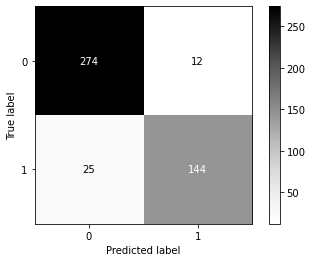

In [114]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_pred_treino)).plot(cmap="Greys")

plt.show()

### Metricas para o teste

In [115]:
y_pred = log_reg.predict(X_test)

In [116]:
print(metrics.classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



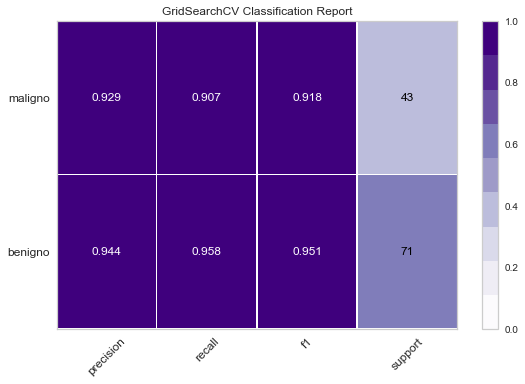

In [125]:
from yellowbrick.classifier import classification_report
classes = [ "benigno","maligno"]
visualizer = classification_report(
    log_reg, X_train, y_train, X_test, y_test, support=True,cmap='Purples', classes=classes
)   

In [117]:
conf_matriz = confusion_matrix(y_test,y_pred)
conf_matriz

array([[68,  3],
       [ 4, 39]], dtype=int64)

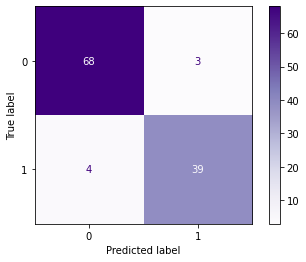

In [118]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot(cmap="Purples")

plt.show()

In [81]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
y_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


In [82]:

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='Falso Positivo', y='Verdadeiro Postivo'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

## KNN

In [83]:
param_grid = {"n_neighbors": range(1,11)}

metrica = 'f1_weighted' 

knn = GridSearchCV(estimator =KNeighborsClassifier() ,
                           param_grid = param_grid,
                           scoring = metrica,
                           cv = 5,
                           verbose = 10)

In [84]:
knn.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START n_neighbors=1..............................................
[CV 1/5; 1/10] END ...............n_neighbors=1;, score=0.865 total time=   0.4s
[CV 2/5; 1/10] START n_neighbors=1..............................................
[CV 2/5; 1/10] END ...............n_neighbors=1;, score=0.830 total time=   0.0s
[CV 3/5; 1/10] START n_neighbors=1..............................................
[CV 3/5; 1/10] END ...............n_neighbors=1;, score=0.870 total time=   0.0s
[CV 4/5; 1/10] START n_neighbors=1..............................................
[CV 4/5; 1/10] END ...............n_neighbors=1;, score=0.832 total time=   0.0s
[CV 5/5; 1/10] START n_neighbors=1..............................................
[CV 5/5; 1/10] END ...............n_neighbors=1;, score=0.822 total time=   0.0s
[CV 1/5; 2/10] START n_neighbors=2..............................................
[CV 1/5; 2/10] END ...............n_neighbors=2;

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 11)}, scoring='f1_weighted',
             verbose=10)

In [86]:
knn.best_params_

{'n_neighbors': 6}

In [87]:
knn.best_score_

0.8798757375370239

### Metricas para o treino

In [34]:
y_pred_knn_treino = knn.predict(X_train)

In [35]:
print(metrics.classification_report(y_train,y_pred_knn_treino)) 

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       286
           1       0.92      0.78      0.84       169

    accuracy                           0.89       455
   macro avg       0.90      0.87      0.88       455
weighted avg       0.89      0.89      0.89       455



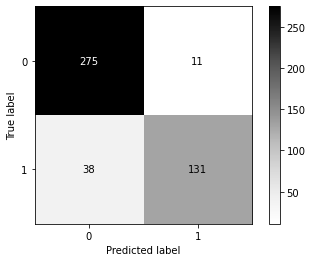

In [36]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_pred_knn_treino)).plot(cmap="Greys")

plt.show()

### Metricas para o teste

In [37]:
y_pred_knn = knn.predict(X_test)

In [38]:
print(metrics.classification_report(y_test,y_pred_knn)) 

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        71
           1       0.97      0.86      0.91        43

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



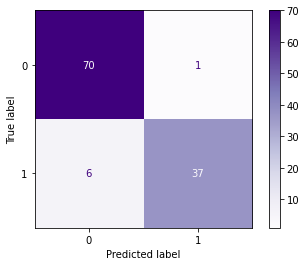

In [39]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_knn)).plot(cmap="Purples")

plt.show()

In [40]:
y_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

In [41]:
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='Falso Positivo', y='Verdadeiro Postivo'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

## Decision Tree

In [126]:
param_grid = {
                'max_depth': range(2,11)}

metrica = "f1_weighted"

dec_tree = GridSearchCV(estimator =  DecisionTreeClassifier(),
                           param_grid = param_grid,
                           scoring = metrica,
                           cv = 5,
                           verbose = 10)

In [127]:
dec_tree.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START max_depth=2.................................................
[CV 1/5; 1/9] END ..................max_depth=2;, score=0.854 total time=   0.0s
[CV 2/5; 1/9] START max_depth=2.................................................
[CV 2/5; 1/9] END ..................max_depth=2;, score=0.862 total time=   0.0s
[CV 3/5; 1/9] START max_depth=2.................................................
[CV 3/5; 1/9] END ..................max_depth=2;, score=0.892 total time=   0.0s
[CV 4/5; 1/9] START max_depth=2.................................................
[CV 4/5; 1/9] END ..................max_depth=2;, score=0.841 total time=   0.0s
[CV 5/5; 1/9] START max_depth=2.................................................
[CV 5/5; 1/9] END ..................max_depth=2;, score=0.860 total time=   0.0s
[CV 1/5; 2/9] START max_depth=3.................................................
[CV 1/5; 2/9] END ..................max_depth=3;,

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 11)}, scoring='f1_weighted',
             verbose=10)

In [128]:
dec_tree.best_params_

{'max_depth': 4}

In [129]:
dec_tree.best_score_

0.8821678350560141

In [130]:
y_pred_dt_treino = dec_tree.predict(X_train)

In [131]:
print(metrics.classification_report(y_train,y_pred_dt_treino)) 

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       286
           1       0.99      0.84      0.91       169

    accuracy                           0.94       455
   macro avg       0.95      0.92      0.93       455
weighted avg       0.94      0.94      0.94       455



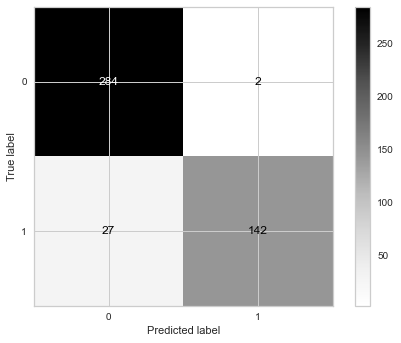

In [132]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_pred_dt_treino)).plot(cmap="Greys")

plt.show()

In [133]:
y_pred_dt = dec_tree.predict(X_test)

In [134]:
print(metrics.classification_report(y_test,y_pred_dt)) 

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        71
           1       0.97      0.84      0.90        43

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



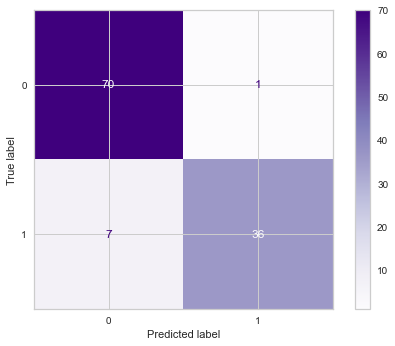

In [135]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_dt)).plot(cmap="Purples")

plt.show()

### Random Forest

In [140]:
param_grid = {'criterion' : ['gini', 'entropy'],'n_estimators' : [10, 100, 500, 1000],
                'max_depth': range(2,5)}

metrica = "f1_weighted"

ran_for = GridSearchCV(estimator =  RandomForestClassifier(),
                           param_grid = param_grid,
                           scoring = metrica,
                           cv = 5,
                           verbose = 10)

In [141]:
ran_for.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START criterion=gini, max_depth=2, n_estimators=10...............
[CV 1/5; 1/24] END criterion=gini, max_depth=2, n_estimators=10;, score=0.897 total time=   0.0s
[CV 2/5; 1/24] START criterion=gini, max_depth=2, n_estimators=10...............
[CV 2/5; 1/24] END criterion=gini, max_depth=2, n_estimators=10;, score=0.862 total time=   0.0s
[CV 3/5; 1/24] START criterion=gini, max_depth=2, n_estimators=10...............
[CV 3/5; 1/24] END criterion=gini, max_depth=2, n_estimators=10;, score=0.934 total time=   0.0s
[CV 4/5; 1/24] START criterion=gini, max_depth=2, n_estimators=10...............
[CV 4/5; 1/24] END criterion=gini, max_depth=2, n_estimators=10;, score=0.853 total time=   0.0s
[CV 5/5; 1/24] START criterion=gini, max_depth=2, n_estimators=10...............
[CV 5/5; 1/24] END criterion=gini, max_depth=2, n_estimators=10;, score=0.854 total time=   0.0s
[CV 1/5; 2/24] START criterion=gini, max_depth=2

[CV 1/5; 10/24] END criterion=gini, max_depth=4, n_estimators=100;, score=0.911 total time=   0.3s
[CV 2/5; 10/24] START criterion=gini, max_depth=4, n_estimators=100.............
[CV 2/5; 10/24] END criterion=gini, max_depth=4, n_estimators=100;, score=0.910 total time=   0.3s
[CV 3/5; 10/24] START criterion=gini, max_depth=4, n_estimators=100.............
[CV 3/5; 10/24] END criterion=gini, max_depth=4, n_estimators=100;, score=0.945 total time=   0.3s
[CV 4/5; 10/24] START criterion=gini, max_depth=4, n_estimators=100.............
[CV 4/5; 10/24] END criterion=gini, max_depth=4, n_estimators=100;, score=0.866 total time=   0.3s
[CV 5/5; 10/24] START criterion=gini, max_depth=4, n_estimators=100.............
[CV 5/5; 10/24] END criterion=gini, max_depth=4, n_estimators=100;, score=0.877 total time=   0.3s
[CV 1/5; 11/24] START criterion=gini, max_depth=4, n_estimators=500.............
[CV 1/5; 11/24] END criterion=gini, max_depth=4, n_estimators=500;, score=0.922 total time=   1.7s
[

[CV 2/5; 19/24] END criterion=entropy, max_depth=3, n_estimators=500;, score=0.898 total time=   1.5s
[CV 3/5; 19/24] START criterion=entropy, max_depth=3, n_estimators=500..........
[CV 3/5; 19/24] END criterion=entropy, max_depth=3, n_estimators=500;, score=0.956 total time=   1.5s
[CV 4/5; 19/24] START criterion=entropy, max_depth=3, n_estimators=500..........
[CV 4/5; 19/24] END criterion=entropy, max_depth=3, n_estimators=500;, score=0.865 total time=   1.5s
[CV 5/5; 19/24] START criterion=entropy, max_depth=3, n_estimators=500..........
[CV 5/5; 19/24] END criterion=entropy, max_depth=3, n_estimators=500;, score=0.877 total time=   1.6s
[CV 1/5; 20/24] START criterion=entropy, max_depth=3, n_estimators=1000.........
[CV 1/5; 20/24] END criterion=entropy, max_depth=3, n_estimators=1000;, score=0.899 total time=   3.1s
[CV 2/5; 20/24] START criterion=entropy, max_depth=3, n_estimators=1000.........
[CV 2/5; 20/24] END criterion=entropy, max_depth=3, n_estimators=1000;, score=0.898 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 5),
                         'n_estimators': [10, 100, 500, 1000]},
             scoring='f1_weighted', verbose=10)

In [142]:
ran_for.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 10}

In [143]:
ran_for.best_score_

0.9084858190238263

In [146]:
y_pred_rf_treino = ran_for.predict(X_train)

In [147]:
print(metrics.classification_report(y_train,y_pred_rf_treino)) 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       286
           1       0.95      0.88      0.91       169

    accuracy                           0.94       455
   macro avg       0.94      0.93      0.93       455
weighted avg       0.94      0.94      0.94       455



In [148]:
y_pred_rf = ran_for.predict(X_test)

In [149]:
print(metrics.classification_report(y_test,y_pred_rf)) 

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



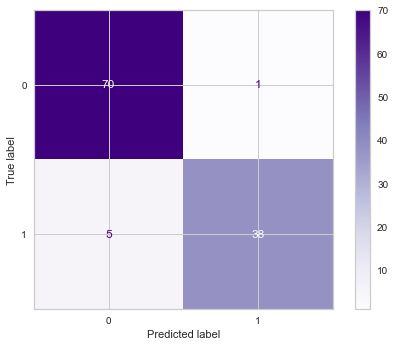

In [150]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf)).plot(cmap="Purples")

plt.show()